In [1]:
#!pip install netCDF4
import netCDF4 as nc
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

#!pip install google.colab
#from google.colab import drive
#drive.mount('/content/drive')

# Arctic All Data

In [2]:
# Open Arctic all csv file
ARCTIC_ALL= pd.read_csv('/Users/francescalingo/OneDrive - The City College of New York/Research- Biogeochem/ARCTIC_ALL_csv_.csv')
ARCTIC_ALL= pd.DataFrame(ARCTIC_ALL)
ARCTIC_ALL

/opt/anaconda3/envs/satenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,1,17,546,547,573,574,580,599,619,623,634,635,636,638,639,640,666,692,693,694,699,700,701,702,710) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ActivityStartDate,Latitude,Longitude,Ammonia-nitrogen,Chlorophyll a,"Chlorophyll a, corrected for pheophytin",Chlorophyll b,Chlorophyll c,Conductivity,...,ag592,ag593,ag594,ag595,ag596,ag597,ag598,ag599,ag600,Discharge_avg/day
0,0,2011-07-06,70.910960,-153.254290,NaN,NaN,NaN,NaN,NaN,488.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011-07-08,70.004000,-153.097780,NaN,NaN,NaN,NaN,NaN,206.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2011-07-09,69.881100,-151.889080,NaN,NaN,NaN,NaN,NaN,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2011-07-09,69.992090,-152.652980,NaN,NaN,NaN,NaN,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2011-07-10,70.101500,-154.365070,NaN,NaN,NaN,NaN,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352799,30.0,2019-06-12,64.100670,-164.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017597,0.014596,0.014535,0.021341,0.014514,0.013418,0.015489,0.013544,0.012827,1.788
352800,32.0,2019-06-26,63.042660,-163.370468,NaN,NaN,NaN,NaN,NaN,NaN,...,0.592557,0.584165,0.577461,0.571828,0.565710,0.559704,0.553892,0.546039,0.536878,1.311
352801,36.0,2019-06-27,62.737549,-164.867706,NaN,NaN,NaN,NaN,NaN,NaN,...,0.404345,0.397508,0.391950,0.389238,0.384284,0.381743,0.375431,0.369214,0.361239,1.268
352802,37.0,2019-06-28,62.810001,-164.850006,NaN,NaN,NaN,NaN,NaN,NaN,...,0.458308,0.451785,0.447818,0.442352,0.436274,0.434136,0.427400,0.420292,0.413484,1.268


In [3]:
# Drop weird column
ARCTIC_ALL = ARCTIC_ALL.drop(['Unnamed: 0'], axis = 1)
ARCTIC_ALL

,ActivityStartDate,Latitude,Longitude,Ammonia-nitrogen,Chlorophyll a,"Chlorophyll a, corrected for pheophytin",Chlorophyll b,Chlorophyll c,Conductivity,Inorganic nitrogen (nitrate and nitrite),...,ag592,ag593,ag594,ag595,ag596,ag597,ag598,ag599,ag600,Discharge_avg/day
0,2011-07-06,70.910960,-153.254290,NaN,NaN,NaN,NaN,NaN,488.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-07-08,70.004000,-153.097780,NaN,NaN,NaN,NaN,NaN,206.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-07-09,69.881100,-151.889080,NaN,NaN,NaN,NaN,NaN,68.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-07-09,69.992090,-152.652980,NaN,NaN,NaN,NaN,NaN,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-07-10,70.101500,-154.365070,NaN,NaN,NaN,NaN,NaN,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352799,2019-06-12,64.100670,-164.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017597,0.014596,0.014535,0.021341,0.014514,0.013418,0.015489,0.013544,0.012827,1.788
352800,2019-06-26,63.042660,-163.370468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.592557,0.584165,0.577461,0.571828,0.565710,0.559704,0.553892,0.546039,0.536878,1.311
352801,2019-06-27,62.737549,-164.867706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.404345,0.397508,0.391950,0.389238,0.384284,0.381743,0.375431,0.369214,0.361239,1.268
352802,2019-06-28,62.810001,-164.850006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.458308,0.451785,0.447818,0.442352,0.436274,0.434136,0.427400,0.420292,0.413484,1.268


In [4]:
ARCTIC_ALL['Date'] = pd.to_datetime(ARCTIC_ALL['Date'], utc=True)
ARCTIC_ALL['Date'] = ARCTIC_ALL['Date'].astype('datetime64[ns]')

ARCTIC_ALL['ActivityStartDate'] = pd.to_datetime(ARCTIC_ALL['ActivityStartDate'], utc=True)
ARCTIC_ALL['ActivityStartDate'] = ARCTIC_ALL['ActivityStartDate'].astype('datetime64[ns]')

ARCTIC_ALL['ActivityStartDate_x'] = pd.to_datetime(ARCTIC_ALL['ActivityStartDate_x'], utc=True)
ARCTIC_ALL['ActivityStartDate_x'] = ARCTIC_ALL['ActivityStartDate_x'].astype('datetime64[ns]')

ARCTIC_ALL[['Date','ActivityStartDate','ActivityStartDate_x']].dtypes                                        

Date                   datetime64[ns]
ActivityStartDate      datetime64[ns]
ActivityStartDate_x    datetime64[ns]
dtype: object

In [5]:
# Have a month and year column

ARCTIC_ALL['Date'] = ARCTIC_ALL['Date'].fillna(ARCTIC_ALL['ActivityStartDate'])
ARCTIC_ALL['Date'] = ARCTIC_ALL['Date'].fillna(ARCTIC_ALL['ActivityStartDate_x'])
ARCTIC_ALL = ARCTIC_ALL.drop(['ActivityStartDate'], axis = 1)
ARCTIC_ALL = ARCTIC_ALL.drop(['ActivityStartDate_x'], axis = 1)


#ARCTIC_ALL = ARCTIC_ALL.dropna(subset=['Date'])
ARCTIC_ALL = ARCTIC_ALL.dropna(subset=['Longitude'])
ARCTIC_ALL = ARCTIC_ALL.dropna(subset=['Latitude'])

ARCTIC_ALL.describe()

,Latitude,Longitude,Ammonia-nitrogen,Chlorophyll a,"Chlorophyll a, corrected for pheophytin",Chlorophyll b,Chlorophyll c,Conductivity,Inorganic nitrogen (nitrate and nitrite),Kjeldahl nitrogen,...,ag592,ag593,ag594,ag595,ag596,ag597,ag598,ag599,ag600,Discharge_avg/day
count,352628.000000,352628.000000,2.000000,35.000000,35.000000,48.000000,48.000000,202.000000,1.0,27.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,69.333803,-150.867746,0.235500,1.966857,1.685714,0.166542,0.334542,33.284158,0.1,2.056296,...,0.352527,0.348177,0.344546,0.342402,0.337196,0.333789,0.329622,0.324481,0.320834,1.598636
std,0.682768,2.346708,0.024749,3.858219,3.242480,0.656308,0.904589,65.917970,NaN,1.118299,...,0.336712,0.332943,0.329420,0.325689,0.321700,0.318997,0.315414,0.310971,0.306732,0.269200
min,0.000000,-165.050003,0.218000,0.000000,0.000000,0.000000,0.000000,6.100000,0.1,1.050000,...,0.017597,0.014596,0.014535,0.021341,0.014514,0.013418,0.015489,0.013544,0.012827,1.196000
25%,69.005700,-152.072170,0.226750,0.465000,0.430000,0.000000,0.000000,10.500000,0.1,1.485000,...,0.049511,0.049159,0.050381,0.048893,0.047167,0.046440,0.047015,0.044624,0.045772,1.289500
50%,69.213780,-152.072170,0.235500,0.770000,0.690000,0.000000,0.057000,11.500000,0.1,1.860000,...,0.404345,0.397508,0.391950,0.389238,0.384284,0.381743,0.375431,0.369214,0.361239,1.788000
75%,69.213780,-148.490400,0.244250,1.550000,1.450000,0.048500,0.170000,13.925000,0.1,2.425000,...,0.585333,0.578565,0.571469,0.567641,0.560138,0.553600,0.545611,0.539037,0.532039,1.788000
max,71.358690,0.000000,0.253000,22.000000,19.000000,4.400000,4.600000,488.000000,0.1,6.870000,...,1.013825,1.003963,0.994597,0.983548,0.971848,0.964342,0.952946,0.939460,0.928018,1.801000


In [6]:
ARCTIC_ALL['year'] = pd.DatetimeIndex(ARCTIC_ALL['Date']).year
ARCTIC_ALL['month'] = pd.DatetimeIndex(ARCTIC_ALL['Date']).month


In [7]:
# Rename some columns
ARCTIC_ALL['Latitude'] = ARCTIC_ALL['Latitude'].fillna(ARCTIC_ALL['Monitoring Location Latitude'])
ARCTIC_ALL['Longitude'] = ARCTIC_ALL['Longitude'].fillna(ARCTIC_ALL['Monitoring Location Longitude'])
ARCTIC_ALL['DOC'] = ARCTIC_ALL['DOC'].fillna(ARCTIC_ALL['dissolved_organic_carbon_umol_L'])

ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['Monitoring Location Latitude'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['Monitoring Location Longitude'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['dissolved_organic_carbon_umol_L'])

In [8]:
# Dropping unnecessary columns
ARCTIC_ALL = ARCTIC_ALL.drop(['DOC Replicate 1 (mg/L)', 'DOC Replicate 2 (mg/L)', 'DOC 1/2 Diff', 'Comp 1', ' Comp 2', ' Comp 3', 'Comp 4', ' Comp 5', 'Comp 6', 'Comp Loadings Sum (of unweighted components)', 'DOC Replicate 1 (mM)', 'DOC Replicate 2 (mM)', 'Depth, Secchi disk depth', 'Depth, Secchi disk depth (choice list)', 'Weather comments (text)', 'flag_NH3', 'flag_PO4', 'flag_SiO2', 'flag_NO23', 'season', 'Who', 'Measuring Agency', 'Meas_Duration(hr)', 'Meas_Rated', 'Control', 'Flow_Adjust_Code', 'SortChem', 'SPM_sd', '%POC/SPM', 'sd', 'cv', 'TDN', 'sd.1', 'cv.1', 'volfilt' ],axis =1)
ARCTIC_ALL.describe()

,Latitude,Longitude,Ammonia-nitrogen,Chlorophyll a,"Chlorophyll a, corrected for pheophytin",Chlorophyll b,Chlorophyll c,Conductivity,Inorganic nitrogen (nitrate and nitrite),Kjeldahl nitrogen,...,ag592,ag593,ag594,ag595,ag596,ag597,ag598,ag599,ag600,Discharge_avg/day
count,352628.000000,352628.000000,2.000000,35.000000,35.000000,48.000000,48.000000,202.000000,1.0,27.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,69.333803,-150.867746,0.235500,1.966857,1.685714,0.166542,0.334542,33.284158,0.1,2.056296,...,0.352527,0.348177,0.344546,0.342402,0.337196,0.333789,0.329622,0.324481,0.320834,1.598636
std,0.682768,2.346708,0.024749,3.858219,3.242480,0.656308,0.904589,65.917970,NaN,1.118299,...,0.336712,0.332943,0.329420,0.325689,0.321700,0.318997,0.315414,0.310971,0.306732,0.269200
min,0.000000,-165.050003,0.218000,0.000000,0.000000,0.000000,0.000000,6.100000,0.1,1.050000,...,0.017597,0.014596,0.014535,0.021341,0.014514,0.013418,0.015489,0.013544,0.012827,1.196000
25%,69.005700,-152.072170,0.226750,0.465000,0.430000,0.000000,0.000000,10.500000,0.1,1.485000,...,0.049511,0.049159,0.050381,0.048893,0.047167,0.046440,0.047015,0.044624,0.045772,1.289500
50%,69.213780,-152.072170,0.235500,0.770000,0.690000,0.000000,0.057000,11.500000,0.1,1.860000,...,0.404345,0.397508,0.391950,0.389238,0.384284,0.381743,0.375431,0.369214,0.361239,1.788000
75%,69.213780,-148.490400,0.244250,1.550000,1.450000,0.048500,0.170000,13.925000,0.1,2.425000,...,0.585333,0.578565,0.571469,0.567641,0.560138,0.553600,0.545611,0.539037,0.532039,1.788000
max,71.358690,0.000000,0.253000,22.000000,19.000000,4.400000,4.600000,488.000000,0.1,6.870000,...,1.013825,1.003963,0.994597,0.983548,0.971848,0.964342,0.952946,0.939460,0.928018,1.801000


In [9]:
# Need to combine some columns together - but can't figure it out

ARCTIC_ALL['Salinity_psu'] = ARCTIC_ALL['Salinity_psu'].fillna(ARCTIC_ALL['Sal psu'])
ARCTIC_ALL['Salinity_psu'] = ARCTIC_ALL['Salinity_psu'].fillna(ARCTIC_ALL['salinity'])

#ARCTIC_ALL['Chlorophyll_1'] = ARCTIC_ALL['Chlorophyll ug/L'].fillna(ARCTIC_ALL['Chlorophyll a'])
ARCTIC_ALL['Chlorophyll_ug/L'] = ARCTIC_ALL['Chlorophyll_ug/L'].fillna(ARCTIC_ALL['Chlorophyll a'])
ARCTIC_ALL['Chlorophyll_ug/L'] = ARCTIC_ALL['Chlorophyll_ug/L'].fillna(ARCTIC_ALL['Chlorophyll ug/L'])

ARCTIC_ALL['DOC'] = ARCTIC_ALL['DOC'].astype(object)
ARCTIC_ALL['DOC'] = ARCTIC_ALL['DOC'].fillna(ARCTIC_ALL['DOC avg'])
ARCTIC_ALL['DOC'] = ARCTIC_ALL['DOC'].fillna(ARCTIC_ALL['Dissolved Organic Carbon'])

ARCTIC_ALL['a300']= ARCTIC_ALL['a300'].fillna(ARCTIC_ALL['ag300'])
ARCTIC_ALL['a300']= ARCTIC_ALL['a300'].fillna(ARCTIC_ALL['ag300.0'])

ARCTIC_ALL['a300-DOC'] = ARCTIC_ALL['a300']/ARCTIC_ALL['DOC']

ARCTIC_ALL['TDN_uM'] = ARCTIC_ALL['TDN_uM'].fillna(ARCTIC_ALL['Total Dissolved Nitrogen'])
ARCTIC_ALL['TDN_uM'] = ARCTIC_ALL['TDN_uM'].fillna(ARCTIC_ALL['total_dissolved_nitrogen_umol_L'])

ARCTIC_ALL['Station'] = ARCTIC_ALL['Station'].fillna(ARCTIC_ALL['station_name'])

#ARCTIC_ALL_MINI['DOC_avg'] = ARCTIC_ALL_MINI['DOC_avg'].fillna(ARCTIC_ALL_MINI['DOC avg'])
#ARCTIC_ALL_MINI['DOC_avg'] = ARCTIC_ALL_MINI['DOC_avg'].fillna(ARCTIC_ALL_MINI['DOC'])

# Drop 

ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['Total Dissolved Nitrogen'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['total_dissolved_nitrogen_umol_L'])

ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['Sal psu'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['salinity'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['DOC avg'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['Dissolved Organic Carbon'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['Chlorophyll ug/L','Chlorophyll','TChl'])
ARCTIC_ALL = ARCTIC_ALL.drop(columns= ['station_name'])

ARCTIC_ALL.describe()

,Latitude,Longitude,Ammonia-nitrogen,Chlorophyll a,"Chlorophyll a, corrected for pheophytin",Chlorophyll b,Chlorophyll c,Conductivity,Inorganic nitrogen (nitrate and nitrite),Kjeldahl nitrogen,...,ag593,ag594,ag595,ag596,ag597,ag598,ag599,ag600,Discharge_avg/day,a300-DOC
count,352628.000000,352628.000000,2.000000,35.000000,35.000000,48.000000,48.000000,202.000000,1.0,27.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,53.000000
mean,69.333803,-150.867746,0.235500,1.966857,1.685714,0.166542,0.334542,33.284158,0.1,2.056296,...,0.348177,0.344546,0.342402,0.337196,0.333789,0.329622,0.324481,0.320834,1.598636,3.177316
std,0.682768,2.346708,0.024749,3.858219,3.242480,0.656308,0.904589,65.917970,NaN,1.118299,...,0.332943,0.329420,0.325689,0.321700,0.318997,0.315414,0.310971,0.306732,0.269200,1.182777
min,0.000000,-165.050003,0.218000,0.000000,0.000000,0.000000,0.000000,6.100000,0.1,1.050000,...,0.014596,0.014535,0.021341,0.014514,0.013418,0.015489,0.013544,0.012827,1.196000,1.378189
25%,69.005700,-152.072170,0.226750,0.465000,0.430000,0.000000,0.000000,10.500000,0.1,1.485000,...,0.049159,0.050381,0.048893,0.047167,0.046440,0.047015,0.044624,0.045772,1.289500,2.286597
50%,69.213780,-152.072170,0.235500,0.770000,0.690000,0.000000,0.057000,11.500000,0.1,1.860000,...,0.397508,0.391950,0.389238,0.384284,0.381743,0.375431,0.369214,0.361239,1.788000,2.721819
75%,69.213780,-148.490400,0.244250,1.550000,1.450000,0.048500,0.170000,13.925000,0.1,2.425000,...,0.578565,0.571469,0.567641,0.560138,0.553600,0.545611,0.539037,0.532039,1.788000,4.333898
max,71.358690,0.000000,0.253000,22.000000,19.000000,4.400000,4.600000,488.000000,0.1,6.870000,...,1.003963,0.994597,0.983548,0.971848,0.964342,0.952946,0.939460,0.928018,1.801000,5.826193


In [10]:
ARCTIC_ALL['DOC'] = ARCTIC_ALL['DOC'].astype(float)
ARCTIC_ALL['DOC'] 

ARCTIC_ALL['Stream'] = ARCTIC_ALL.Stream.astype(str)
ARCTIC_ALL["Stream"] = ARCTIC_ALL["Stream"].replace('nan', np.NaN)
ARCTIC_ALL["Stream"]

ARCTIC_ALL.describe()

,Latitude,Longitude,Ammonia-nitrogen,Chlorophyll a,"Chlorophyll a, corrected for pheophytin",Chlorophyll b,Chlorophyll c,Conductivity,Inorganic nitrogen (nitrate and nitrite),Kjeldahl nitrogen,...,ag593,ag594,ag595,ag596,ag597,ag598,ag599,ag600,Discharge_avg/day,a300-DOC
count,352628.000000,352628.000000,2.000000,35.000000,35.000000,48.000000,48.000000,202.000000,1.0,27.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,53.000000
mean,69.333803,-150.867746,0.235500,1.966857,1.685714,0.166542,0.334542,33.284158,0.1,2.056296,...,0.348177,0.344546,0.342402,0.337196,0.333789,0.329622,0.324481,0.320834,1.598636,3.177316
std,0.682768,2.346708,0.024749,3.858219,3.242480,0.656308,0.904589,65.917970,NaN,1.118299,...,0.332943,0.329420,0.325689,0.321700,0.318997,0.315414,0.310971,0.306732,0.269200,1.182777
min,0.000000,-165.050003,0.218000,0.000000,0.000000,0.000000,0.000000,6.100000,0.1,1.050000,...,0.014596,0.014535,0.021341,0.014514,0.013418,0.015489,0.013544,0.012827,1.196000,1.378189
25%,69.005700,-152.072170,0.226750,0.465000,0.430000,0.000000,0.000000,10.500000,0.1,1.485000,...,0.049159,0.050381,0.048893,0.047167,0.046440,0.047015,0.044624,0.045772,1.289500,2.286597
50%,69.213780,-152.072170,0.235500,0.770000,0.690000,0.000000,0.057000,11.500000,0.1,1.860000,...,0.397508,0.391950,0.389238,0.384284,0.381743,0.375431,0.369214,0.361239,1.788000,2.721819
75%,69.213780,-148.490400,0.244250,1.550000,1.450000,0.048500,0.170000,13.925000,0.1,2.425000,...,0.578565,0.571469,0.567641,0.560138,0.553600,0.545611,0.539037,0.532039,1.788000,4.333898
max,71.358690,0.000000,0.253000,22.000000,19.000000,4.400000,4.600000,488.000000,0.1,6.870000,...,1.003963,0.994597,0.983548,0.971848,0.964342,0.952946,0.939460,0.928018,1.801000,5.826193


In [11]:
# Creating dictionary that matches names of places with a number


# creating a dict file 
Place_1 = {'Yukon':1,
         'Barrow': 2,
         'Prudhoe Bay':3,
         'Colville':3,
         'Kuparuk':3,
         'Sagavanirtok':3}
  
# traversing through dataframe
# values where key matches


# Mapping the dictionary keys to the data frame.
ARCTIC_ALL['Place_1'] = ARCTIC_ALL['Place'].map(Place_1)

In [12]:
# Stream Data

# Creating dictionary that matches names of places with a number


# creating a dict file 
Stream_1 = {'Colville':1,
          'Kuparuk':2,
          'Sagavanirtok':3}
  
# traversing through dataframe
# values where key matches

# Mapping the dictionary keys to the data frame.
ARCTIC_ALL['Stream_1'] = ARCTIC_ALL['Stream'].map(Stream_1)
ARCTIC_ALL['Stream_1'].unique()


array([nan,  1.,  2.,  3.])

In [13]:
# Prudhoe Bay Data

Prud_Bay_ALL = ARCTIC_ALL.loc[ARCTIC_ALL['Place_1'] == 3]
Prud_Bay_ALL = Prud_Bay_ALL.dropna(axis=1,how='all')

Prud_Bay_ALL.describe()

,Latitude,Longitude,Conductivity,Nitrate + Nitrite,pH,S275:295,a300,Ammonium,Chloride,Salinity_psu,...,temperature_C,d18O,index,Hs_m,Hi_m,air_temp_C,water_temp_C,a300-DOC,Place_1,Stream_1
count,331447.000000,331447.000000,169.000000,4.000000,185.000000,14.000000,114.000000,4.0000,2.000000,59.000000,...,45.000000,30.000000,3404.000000,3404.000000,3277.000000,3404.000000,3404.000000,14.000000,331447.0,322861.000000
mean,69.209050,-150.516704,12.398817,2.302500,6.172351,0.021493,17.627805,0.3725,2.810000,18.322542,...,5.271111,-9.420000,1701.500000,0.123796,1.423299,-8.181771,-1.516019,2.214003,3.0,1.833058
std,0.484174,1.950070,7.772494,0.967139,1.059118,0.001568,23.044351,0.0350,2.149605,11.304656,...,4.493158,6.331715,982.794485,0.094485,0.344073,8.483414,1.026400,0.286959,0.0,0.983578
min,0.000000,-152.072170,6.100000,0.860000,4.140000,0.019600,0.700000,0.3300,1.290000,0.070000,...,-2.300000,-21.000000,0.000000,0.000000,-0.380000,-32.562000,-2.860000,1.679371,3.0,1.000000
25%,69.005700,-152.072170,10.400000,2.202500,5.420000,0.020350,3.608813,0.3525,2.050000,7.235000,...,1.400000,-15.550000,850.750000,0.050000,1.220000,-14.438000,-2.080000,1.977381,3.0,1.000000
50%,69.213780,-152.072170,11.300000,2.725000,5.720000,0.020950,12.150000,0.3750,2.810000,21.190000,...,6.100000,-6.100000,1701.500000,0.095000,1.400000,-7.938000,-2.050000,2.316701,3.0,1.000000
75%,69.213780,-148.490400,12.000000,2.825000,7.270000,0.022550,18.400000,0.3950,3.570000,27.005000,...,8.900000,-4.250000,2552.250000,0.200000,1.480000,-0.062000,-1.845000,2.410887,3.0,3.000000
max,71.195000,0.000000,64.300000,2.900000,8.760000,0.025000,145.000000,0.4100,4.330000,39.890000,...,12.200000,-2.700000,3403.000000,0.800000,2.400000,11.875000,14.310000,2.615416,3.0,3.000000


In [14]:
# transfer over to the other script
# New column to show the day of the year 


# Open Arctic all csv file
Sag_River_Dis = pd.read_excel('/Users/francescalingo/OneDrive - The City College of New York/Research- Biogeochem/USGS_Discharge_Rivers.xlsx',sheet_name = 'USGS 15908000 SAGAVANIRKTOK R N')
Sag_River_Dis = pd.DataFrame(Sag_River_Dis)
Sag_River_Dis['Stream'] = 'Sagavanirktok'
Sag_River_Dis['Stream'] = Sag_River_Dis.Stream.astype(str)
Sag_River_Dis['day_of_year'] = pd.DatetimeIndex(Sag_River_Dis['Datetime']).day_of_year
#Sag_River_Dis = Sag_River_Dis.dropna() #(axis='columns')

Colville_River_Dis = pd.read_excel('/Users/francescalingo/OneDrive - The City College of New York/Research- Biogeochem/USGS_Discharge_Rivers.xlsx',sheet_name = 'USGS 15875000 COLVILLE R AT UMI')
Colville_River_Dis = pd.DataFrame(Colville_River_Dis)
Colville_River_Dis['Stream'] = 'Colville'
Colville_River_Dis['Stream'] = Colville_River_Dis.Stream.astype(str)
Colville_River_Dis['day_of_year'] = pd.DatetimeIndex(Colville_River_Dis['Datetime']).day_of_year
#Colville_River_Dis = Colville_River_Dis.dropna() #(axis='columns')

Kuparuk_River_Dis = pd.read_excel('/Users/francescalingo/OneDrive - The City College of New York/Research- Biogeochem/USGS_Discharge_Rivers.xlsx',sheet_name = 'KUPARUK R NR DEADHORSE AK')
Kuparuk_River_Dis = pd.DataFrame(Kuparuk_River_Dis)
Kuparuk_River_Dis['Stream'] = 'Kuparuk'
Kuparuk_River_Dis['Stream'] = Kuparuk_River_Dis.Stream.astype(str)
Kuparuk_River_Dis['day_of_year'] = pd.DatetimeIndex(Kuparuk_River_Dis['Datetime']).day_of_year
#Kuparuk_River_Dis = Kuparuk_River_Dis.dropna() #(axis='columns')


In [15]:
# One big Dataset = River_Dis
River_Dis = pd.DataFrame()
places = [Sag_River_Dis, Colville_River_Dis, Kuparuk_River_Dis]
River_Dis = pd.concat(places)
River_Dis['Stream'] = River_Dis.Stream.astype(str)
#River_Dis['Discharge ft3/s'] = pd.to_numeric(River_Dis['Discharge ft3/s'], errors='coerce')

#River_Dis['Discharge ft3/s'] = pd.to_numeric(River_Dis['Discharge ft3/s'], errors="coerce").fillna(0).astype("int64")
River_Dis['Discharge ft3/s'] = River_Dis['Discharge ft3/s'].astype('string')
River_Dis['Discharge ft3/s'] = River_Dis['Discharge ft3/s'].astype('float')
#River_Dis['Discharge ft3/s'] = int(float(River_Dis['Discharge ft3/s']))



# Add Spring and Summer columns 
River_Dis['Spring_Summer'] = (River_Dis['day_of_year'] >201).astype('int64') # Spring = 0; Summer = 1


River_Dis.dtypes
#River_Dis #.describe()

Datetime           datetime64[ns]
Discharge ft3/s           float64
Unnamed: 2                float64
Stream                     object
day_of_year                 int64
Spring_Summer               int64
dtype: object

In [239]:
Prudhoe_Bay['Chlorophyll_ug/L'].describe()

count    90.000000
mean      1.824889
std       3.250750
min      -0.100000
25%       0.357500
50%       0.770000
75%       1.940000
max      24.860000
Name: Chlorophyll_ug/L, dtype: float64

In [240]:
print(Prudhoe_Bay['Chlorophyll_ug/L'].describe())
print(' ')
print(Yukon['Chlorophyll_ug/L'].describe())
print(' ')
print(Barrow['Chlorophyll_ug/L'].describe())

count    90.000000
mean      1.824889
std       3.250750
min      -0.100000
25%       0.357500
50%       0.770000
75%       1.940000
max      24.860000
Name: Chlorophyll_ug/L, dtype: float64
 
count    11.000000
mean      1.393298
std       1.096233
min       0.179903
25%       0.328512
50%       1.830333
75%       2.090904
max       2.980281
Name: Chlorophyll_ug/L, dtype: float64
 
count    135.000000
mean       3.434501
std        4.608996
min        0.000000
25%        0.645000
50%        2.010000
75%        4.045000
max       25.774000
Name: Chlorophyll_ug/L, dtype: float64


In [237]:
# Plot day of the year vs. Discharge linegraph  for average Colville 
#!pip install folium
import folium
from branca.colormap import linear
from folium import plugins

# Plotting all Data Points 
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

#ARCTIC_ALL['TDS_g/L'] = ARCTIC_ALL['TDS_mg/L']*0.001

sub_df = ARCTIC_ALL[['Latitude','Longitude','TDS_g/L']].drop_duplicates()


# Get drop data that doesn't have location data 
sub_df = sub_df.dropna(subset=["Latitude","Longitude",'TDS_g/L']) 

# Creating the map
map = folium.Map(location= [70.25, -148], zoom_start=7)
                 

colormap = linear.YlOrRd_05.scale(0,ARCTIC_ALL['TDS_g/L'].max())

for index, location_info in sub_df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]],radius = 8,color = colormap(location_info['TDS_g/L']),fill_color = colormap(location_info['TDS_g/L']), fill_opacity = 0.9).add_to(map)

# Legend Caption
colormap.caption = "TDS_g/L"
colormap.add_to(map)

# Print map
map

# Coastal vs. Land Samples

In [181]:
# Getting Stats for each location
Barrow = ARCTIC_ALL.loc[ARCTIC_ALL['Place'] == 'Barrow'] #, ['DOC']]
Prudhoe_Bay = ARCTIC_ALL.loc[ARCTIC_ALL['Place'] == 'Prudhoe Bay']
Yukon = ARCTIC_ALL.loc[ARCTIC_ALL['Place'] == 'Yukon', ['DOC']]


## Coastal Samples 

In [244]:
## Create a polygon to differentiate coastal water samples vs land 

from shapely.geometry import Point, Polygon

# Define locations
Yukon = ARCTIC_ALL.loc[ARCTIC_ALL['Place'] == 'Yukon']
Barrow = ARCTIC_ALL.loc[ARCTIC_ALL['Place'] == 'Barrow']
Prudhoe_Bay = ARCTIC_ALL.loc[ARCTIC_ALL['Place'] == 'Prudhoe Bay']

# Define coastal Polygon per region 
Yukon_coords = {'Latitude': [60.59600163,60.91801733,63.30120689,62.90985359,63.26107268,63.671675,63.70981164,63.81625511,64.64683358,65.42267058,65.96229206,65.51690612,65.30355952,64.57138652,64.39231439,64.46896007,64.27452198,64.66788454,64.108292,63.66595008,63.55128986,63.6345543,63.32571336,63.05337859,63.31192562,63.23449164,62.56639824,61.77143238,61.42655124],
               'Longitude': [-165.49833,-173.76005,-171.76054,-169.62576,-168.58034,-170.12175,-171.48572,-171.59642,-172.32235,-170.92275,-168.90792,-168.03617,-167.16442,-166.38771,-164.93535,-163.5489,-162.6799,-161.72301,-161.08363,-161.05727,-161.90981,-162.6481,-162.59537,-163.20183,-163.91377,-164.59059,-165.06712,-166.19597,-166.03666]}

Barrow_coords = {'Latitude': [70.8631725,70.3428087,71.1483337,71.9096399,72.4930793,71.4979405,70.9255396,70.9439804,70.9408906,70.797871,70.8720057,71.0067434,71.1156919,71.1897238,71.2638481,71.2227189,71.1934906,71.1651053,71.2414072,71.2784133,71.3566598,71.2638068,71.1607544,70.9099381,70.798238],
               'Longitude': [-159.39468,-161.77047,-163.38821,-160.66909,-155.02761,-151.91024,-152.69096,-153.18058,-153.78006,-154.14407,-154.52053,-154.46851,-154.52636,-155.28064,-155.69718,-155.77224,-155.92787,-156.09861,-156.03218,-156.35662,-156.62338,-156.85958,-157.05734,-157.65884,-158.66409]}

PBay_coords = {'Latitude': [71.82738586005564,70.43523794763267,70.48558932846808,70.21721848956298,70.14402837401022,69.9710005195718,70.29145203487948,71.19582535496197],
               'Longitude': [-151.04745636833104,-151.47043000114354,-149.1380660983108,-147.7082122718944,-145.97074125797803,-144.91892927958466,-144.17473448869129,-143.03790740690454]}

Yukon_coords = pd.DataFrame(Yukon_coords)
Barrow_coords = pd.DataFrame(Barrow_coords)
PBay_coords = pd.DataFrame(PBay_coords)


polygon = Polygon([tuple(x) for x in PBay_coords[['Latitude','Longitude']].to_numpy()])

Yukon_polygon = Polygon([tuple(x) for x in Yukon_coords[['Latitude','Longitude']].to_numpy()])
Barrow_polygon = Polygon([tuple(x) for x in Barrow_coords[['Latitude','Longitude']].to_numpy()])
PBay_polygon = Polygon([tuple(x) for x in PBay_coords[['Latitude','Longitude']].to_numpy()])

# Samples within should be Coastal= PIP test with 'within'
#Prudhoe_Bay['coastal'] = Prudhoe_Bay.apply(lambda x: polygon.contains(Point(x['Latitude'], x['Longitude'])), axis=1)   # True

Yukon['coastal'] = Yukon.apply(lambda x: Yukon_polygon.contains(Point(x['Latitude'], x['Longitude'])), axis=1)   # True
Barrow['coastal'] = Barrow.apply(lambda x: Barrow_polygon.contains(Point(x['Latitude'], x['Longitude'])), axis=1)   # True
Prudhoe_Bay['coastal'] = Prudhoe_Bay.apply(lambda x: PBay_polygon.contains(Point(x['Latitude'], x['Longitude'])), axis=1)   # True

Yukon['coastal'] = Yukon['coastal'].astype('string')
Barrow['coastal'] = Barrow['coastal'].astype('string')
Prudhoe_Bay['coastal'] = Prudhoe_Bay['coastal'].astype('string')


# Coastal vs Terrestrial 
Yukon_coastal = Yukon.loc[Yukon['coastal'] == 'True']
Yukon_terrestrial = Yukon.loc[Yukon['coastal'] == 'False']

Barrow_coastal = Barrow.loc[Barrow['coastal'] == 'True']
Barrow_terrestrial = Barrow.loc[Barrow['coastal'] == 'False']

PBay_coastal = Prudhoe_Bay.loc[Prudhoe_Bay['coastal'] == 'True']
PBay_terrestrial = Prudhoe_Bay.loc[Prudhoe_Bay['coastal'] == 'False']


/var/folders/ww/h0h0w96s1nd725gvjmt_rgbc0000gn/T/ipykernel_8972/828732843.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yukon['coastal'] = Yukon.apply(lambda x: Yukon_polygon.contains(Point(x['Latitude'], x['Longitude'])), axis=1)   # True
/var/folders/ww/h0h0w96s1nd725gvjmt_rgbc0000gn/T/ipykernel_8972/828732843.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Barrow['coastal'] = Barrow.apply(lambda x: Barrow_polygon.contains(Point(x['Latitude'], x['Longitude'])), axis=1)   # True
/var/folders/ww

### Yukon

In [183]:
# Plot day of the year vs. Discharge linegraph  for average Colville 
#!pip install folium
import folium
from branca.colormap import linear
from folium import plugins

# Plotting all Data Points 
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

sub_df = Yukon_coastal[['Latitude','Longitude','DOC']].drop_duplicates()


# Get drop data that doesn't have location data 
sub_df = sub_df.dropna(subset=["Latitude","Longitude",'DOC']) 

# Creating the map
map = folium.Map(location= [70.25, -148], zoom_start=7)
                 

colormap = linear.YlOrRd_05.scale(
    Yukon['DOC'].min(),Yukon['DOC'].max())

for index, location_info in sub_df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]],radius = 8,color = colormap(location_info['DOC']),fill_color = colormap(location_info['DOC']), fill_opacity = 0.9).add_to(map)

# Legend Caption
colormap.caption = "DOC avg"
colormap.add_to(map)

# Print map
map

In [184]:
# Plot day of the year vs. Discharge linegraph  for average Colville 
#!pip install folium
import folium
from branca.colormap import linear
from folium import plugins


# Plotting all Data Points 
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

sub_df = Yukon_terrestrial[['Latitude','Longitude','DOC']].drop_duplicates()


# Get drop data that doesn't have location data 
sub_df = sub_df.dropna(subset=["Latitude","Longitude",'DOC']) 

# Creating the map
map = folium.Map(location= [70.25, -148], zoom_start=7)
                 

colormap = linear.YlOrRd_05.scale(
    Yukon['DOC'].min(),Yukon['DOC'].max())

for index, location_info in sub_df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]],radius = 8,color = colormap(location_info['DOC']),fill_color = colormap(location_info['DOC']), fill_opacity = 0.9).add_to(map)

# Legend Caption
colormap.caption = "DOC avg"
colormap.add_to(map)

# Print map
map

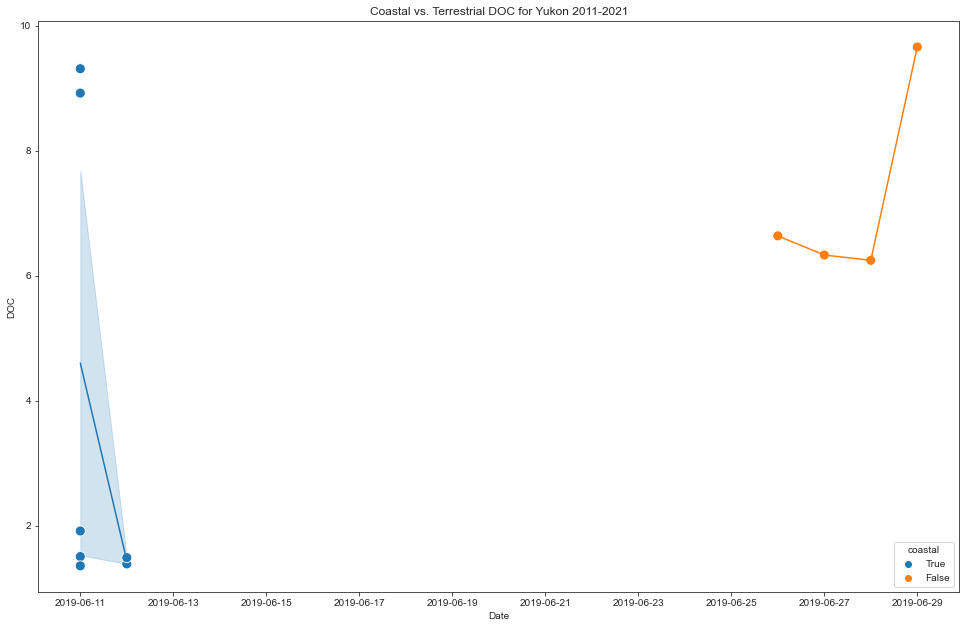

In [185]:
## Now, that we have established coastal vs non coastal for Prudhoe Bay
# Line plot comparing DOC values with time 

# Plot day of the year vs. Discharge linegraph  for average Colville 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)


ax = sns.lineplot(x = Yukon['Date'], y = Yukon['DOC'], hue= Yukon['coastal'], legend = False)
ax = sns.scatterplot(x = Yukon['Date'],
            y = Yukon['DOC'],
            #data= River_Dis,
            ci = None,
            s = 100,
            #palette = 'Spectral',
            hue = Yukon['coastal'],
            )


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([0,365])        
plt.xlabel('Date')
plt.ylabel('DOC')
plt.title('Coastal vs. Terrestrial DOC for Yukon 2011-2021')
plt.show()


### Barrow

In [186]:
# Plot day of the year vs. Discharge linegraph  for average Colville 
#!pip install folium
import folium
from branca.colormap import linear
from folium import plugins

# Plotting all Data Points 
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

sub_df = Barrow_coastal[['Latitude','Longitude','DOC']].drop_duplicates()


# Get drop data that doesn't have location data 
sub_df = sub_df.dropna(subset=["Latitude","Longitude",'DOC']) 

# Creating the map
map = folium.Map(location= [70.25, -148], zoom_start=7)
                 

colormap = linear.YlOrRd_05.scale(
    Barrow['DOC'].min(),Barrow['DOC'].max())

for index, location_info in sub_df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]],radius = 8,color = colormap(location_info['DOC']),fill_color = colormap(location_info['DOC']), fill_opacity = 0.9).add_to(map)

# Legend Caption
colormap.caption = "DOC avg"
colormap.add_to(map)

# Print map
map

In [187]:
# Plot day of the year vs. Discharge linegraph  for average Colville 
#!pip install folium
import folium
from branca.colormap import linear
from folium import plugins


# Plotting all Data Points 
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

sub_df = Barrow_terrestrial[['Latitude','Longitude','DOC']].drop_duplicates()


# Get drop data that doesn't have location data 
sub_df = sub_df.dropna(subset=["Latitude","Longitude",'DOC']) 

# Creating the map
map = folium.Map(location= [70.25, -148], zoom_start=7)
                 

colormap = linear.YlOrRd_05.scale(
    Barrow['DOC'].min(),Barrow['DOC'].max())

for index, location_info in sub_df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]],radius = 8,color = colormap(location_info['DOC']),fill_color = colormap(location_info['DOC']), fill_opacity = 0.9).add_to(map)

# Legend Caption
colormap.caption = "DOC avg"
colormap.add_to(map)

# Print map
map

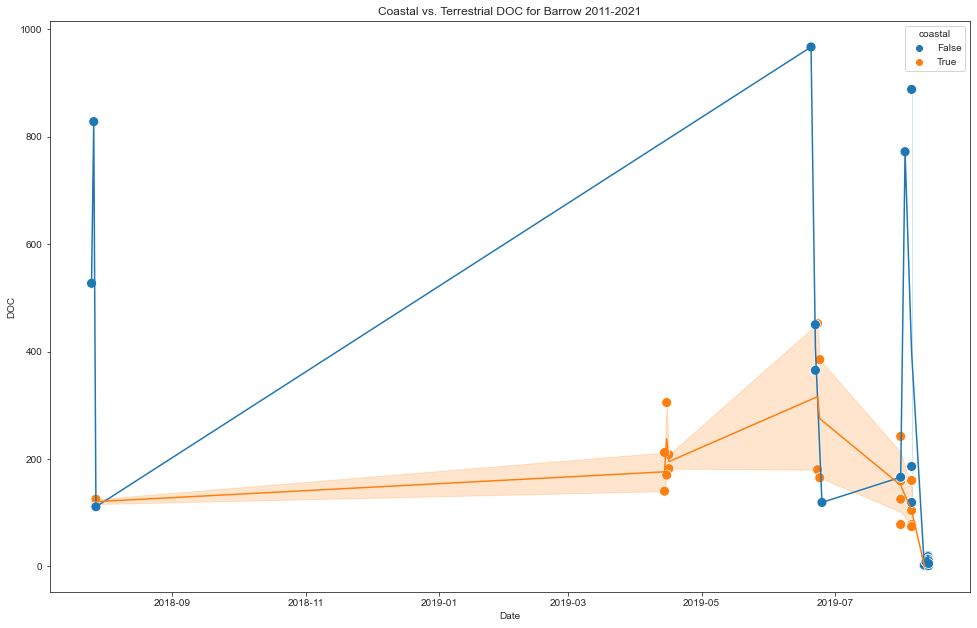

In [188]:
## Now, that we have established coastal vs non coastal for Prudhoe Bay
# Line plot comparing DOC values with time 

# Plot day of the year vs. Discharge linegraph  for average Colville 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)


ax = sns.lineplot(x = Barrow['Date'], y = Barrow['DOC'], hue= Barrow['coastal'], legend = False)
ax = sns.scatterplot(x = Barrow['Date'],
            y = Barrow['DOC'],
            #data= River_Dis,
            ci = None,
            s = 100,
            #palette = 'Spectral',
            hue = Barrow['coastal'],
            )


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([0,365])        
plt.xlabel('Date')
plt.ylabel('DOC')
plt.title('Coastal vs. Terrestrial DOC for Barrow 2011-2021')
plt.show()


### Prudhoe Bay

In [189]:
# Plot day of the year vs. Discharge linegraph  for average Colville 
#!pip install folium
import folium
from branca.colormap import linear
from folium import plugins

PBay_coastal = Prudhoe_Bay.loc[Prudhoe_Bay['coastal'] == 'True']

# Plotting all Data Points 
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

sub_df = PBay_coastal[['Latitude','Longitude','DOC']].drop_duplicates()


# Get drop data that doesn't have location data 
sub_df = sub_df.dropna(subset=["Latitude","Longitude",'DOC']) 

# Creating the map
map = folium.Map(location= [70.25, -148], zoom_start=7)
                 

colormap = linear.YlOrRd_05.scale(
    Prudhoe_Bay['DOC'].min(),Prudhoe_Bay['DOC'].max())

for index, location_info in sub_df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]],radius = 8,color = colormap(location_info['DOC']),fill_color = colormap(location_info['DOC']), fill_opacity = 0.9).add_to(map)

# Legend Caption
colormap.caption = "DOC avg"
colormap.add_to(map)

# Print map
map

In [190]:
# Plot day of the year vs. Discharge linegraph  for average Colville 
#!pip install folium
import folium
from branca.colormap import linear
from folium import plugins

PBay_terrestrial = Prudhoe_Bay.loc[Prudhoe_Bay['coastal'] == 'False']

# Plotting all Data Points 
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

sub_df = PBay_terrestrial[['Latitude','Longitude','DOC']].drop_duplicates()


# Get drop data that doesn't have location data 
sub_df = sub_df.dropna(subset=["Latitude","Longitude",'DOC']) 

# Creating the map
map = folium.Map(location= [70.25, -148], zoom_start=7)
                 

colormap = linear.YlOrRd_05.scale(
    Prudhoe_Bay['DOC'].min(),Prudhoe_Bay['DOC'].max())

for index, location_info in sub_df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]],radius = 8,color = colormap(location_info['DOC']),fill_color = colormap(location_info['DOC']), fill_opacity = 0.9).add_to(map)

# Legend Caption
colormap.caption = "DOC avg"
colormap.add_to(map)

# Print map
map

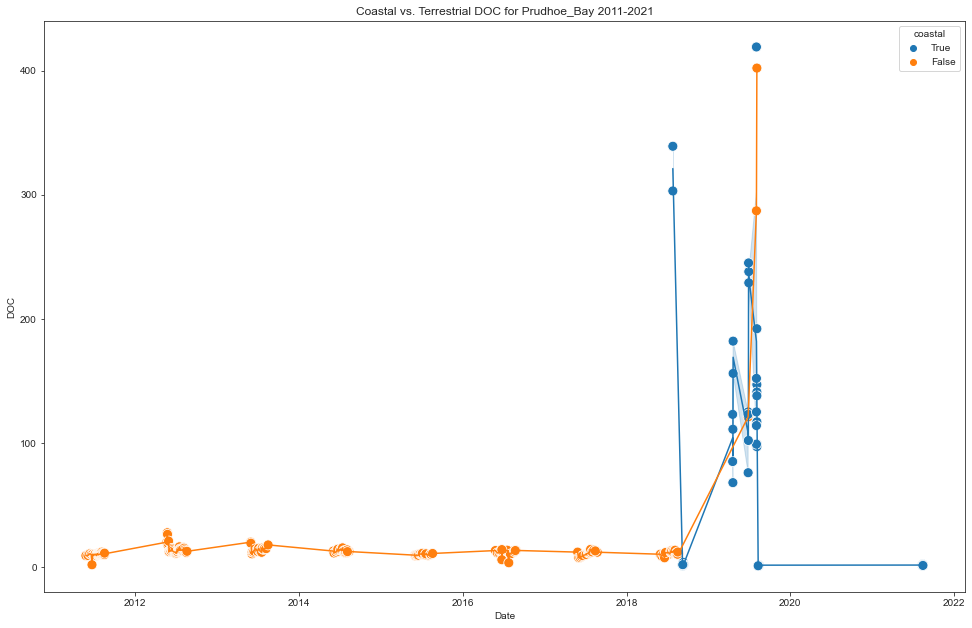

In [191]:
## Now, that we have established coastal vs non coastal for Prudhoe Bay
# Line plot comparing DOC values with time 

# Plot day of the year vs. Discharge linegraph  for average Colville 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)


ax = sns.lineplot(x = Prudhoe_Bay['Date'], y = Prudhoe_Bay['DOC'], hue= Prudhoe_Bay['coastal'], legend = False)
ax = sns.scatterplot(x = Prudhoe_Bay['Date'],
            y = Prudhoe_Bay['DOC'],
            #data= River_Dis,
            ci = None,
            s = 100,
            #palette = 'Spectral',
            hue = Prudhoe_Bay['coastal'],
            )


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([0,365])        
plt.xlabel('Date')
plt.ylabel('DOC')
plt.title('Coastal vs. Terrestrial DOC for Prudhoe_Bay 2011-2021')
plt.show()


Colville_River## Day in year 

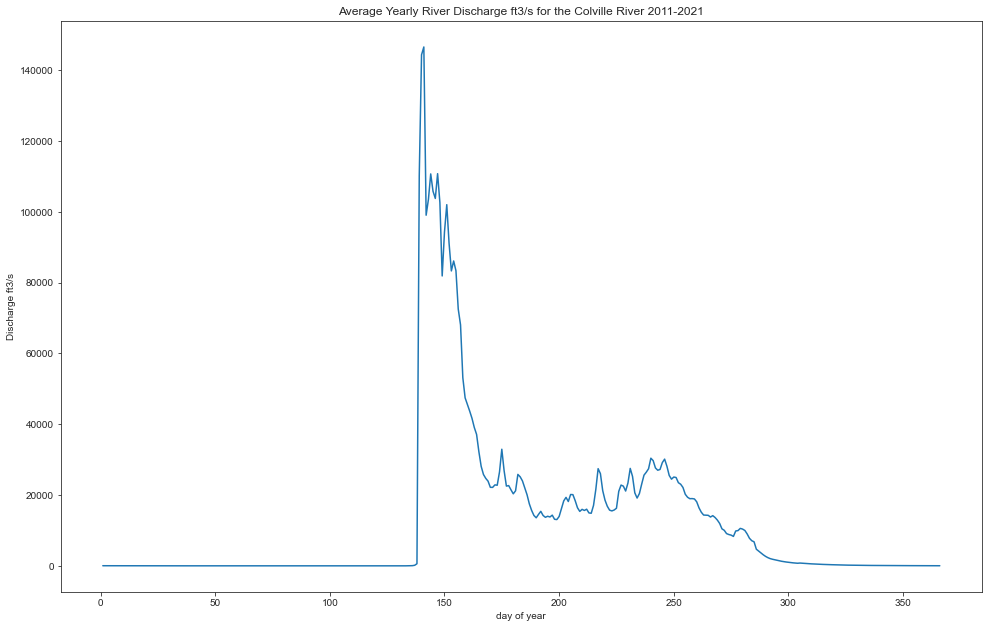

In [192]:
## Testing to find average for COlville

#!pip install numpy_indexed
import numpy_indexed as npi

#Colville_River = Colville_River.dropna()
x = np.concatenate([Colville_River['day_of_year']])
y = np.concatenate([Colville_River['Discharge ft3/s']])
x_unique, y_mean = npi.group_by(x).mean(y)



# Plot day of the year vs. Discharge linegraph  for average Colville 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = x_unique,
            y = y_mean,
            #data= River_Dis,
            ci = None)
            #palette = 'Spectral',
            #hue = River_Dis['Stream'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Average Yearly River Discharge ft3/s for the Colville River 2011-2021')

plt.show()

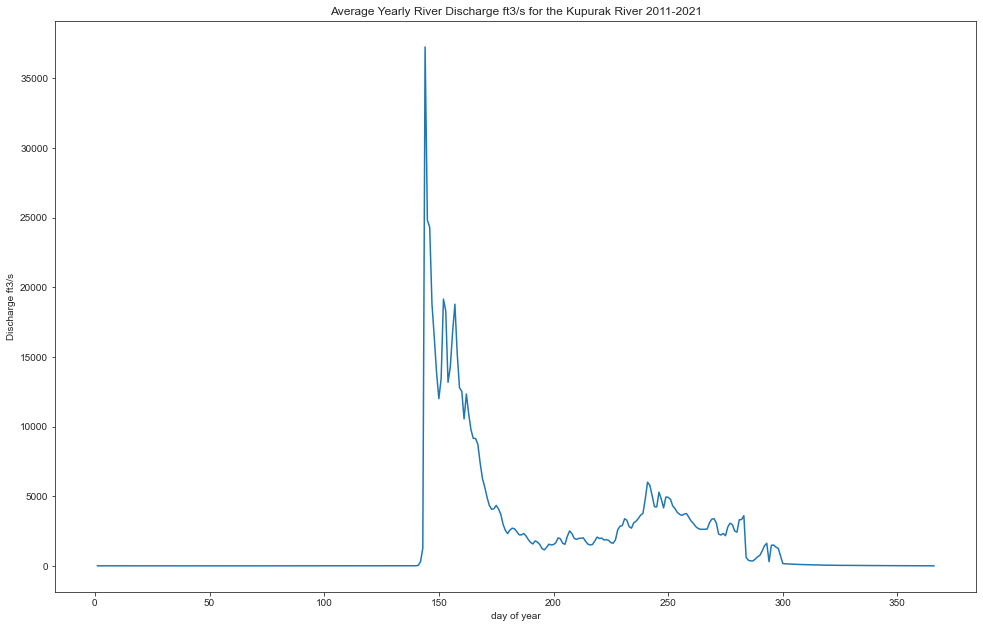

In [193]:
## Testing to find average for Kup

#!pip install numpy_indexed
import numpy_indexed as npi

#Kup_River = Kup_River.dropna()
x_K = np.concatenate([Kup_River['day_of_year']])
y_K = np.concatenate([Kup_River['Discharge ft3/s']])
x_unique_K, y_mean_K = npi.group_by(x_K).mean(y_K)



# Plot day of the year vs. Discharge linegraph  for average Colville 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = x_unique_K,
            y = y_mean_K,
            #data= River_Dis,
            ci = None)
            #palette = 'Spectral',
            #hue = River_Dis['Stream'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([0,365])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Average Yearly River Discharge ft3/s for the Kupurak River 2011-2021')

plt.show()

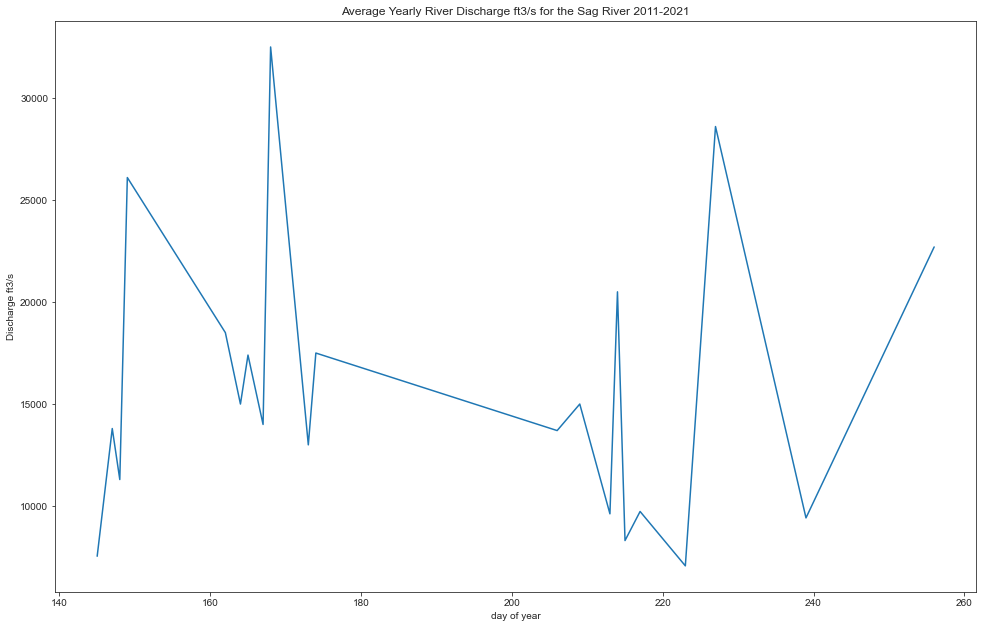

In [194]:
## Testing to find average for Sagavanirktok_River

#!pip install numpy_indexed
import numpy_indexed as npi

#Sagavanirktok_River = Sagavanirktok_River.dropna()
x_S = np.concatenate([Sag_River['day_of_year']])
y_S = np.concatenate([Sag_River['Discharge ft3/s']])
x_unique_S, y_mean_S = npi.group_by(x_S).mean(y_S)



# Plot day of the year vs. Discharge linegraph  for average Colville 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = x_unique_S,
            y = y_mean_S,
            #data= River_Dis,
            ci = None)
            #palette = 'Spectral',
            #hue = River_Dis['Stream'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([0,365])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Average Yearly River Discharge ft3/s for the Sag River 2011-2021')

plt.show()

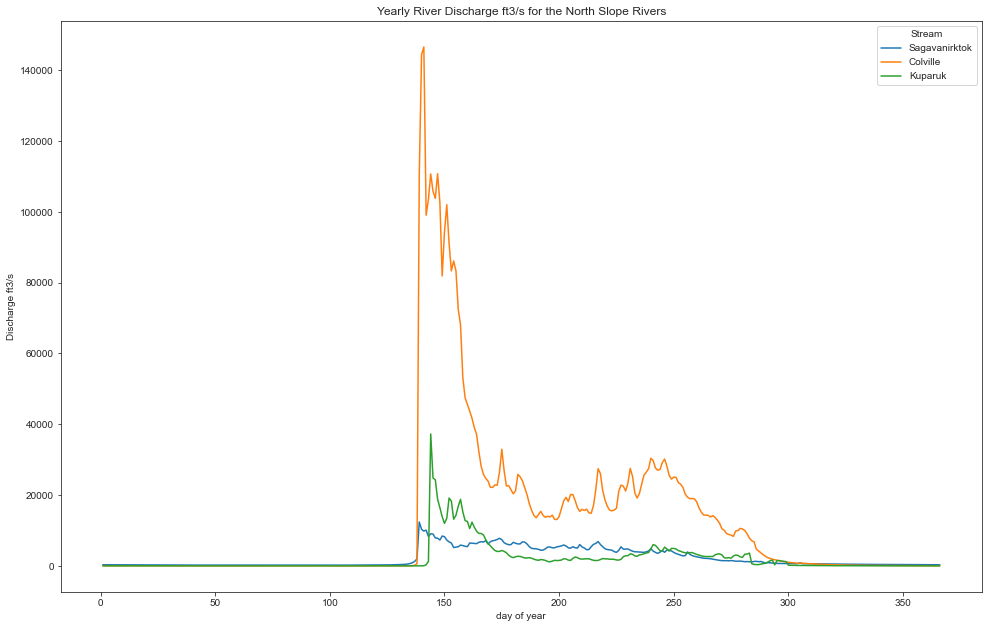

In [195]:
# For all North Slope River data 

# Plot day of the year vs. Discharge linegraph 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = River_Dis['day_of_year'],
            y = River_Dis['Discharge ft3/s'],
            data= River_Dis,
            ci = None,
            #palette = 'Spectral',
            hue = River_Dis['Stream'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Yearly River Discharge ft3/s for the North Slope Rivers')

plt.show()

In [196]:
River_Dis.columns

Index(['Datetime', 'Discharge ft3/s', 'Unnamed: 2', 'Stream', 'day_of_year',
       'Spring_Summer', 'year'],
      dtype='object')

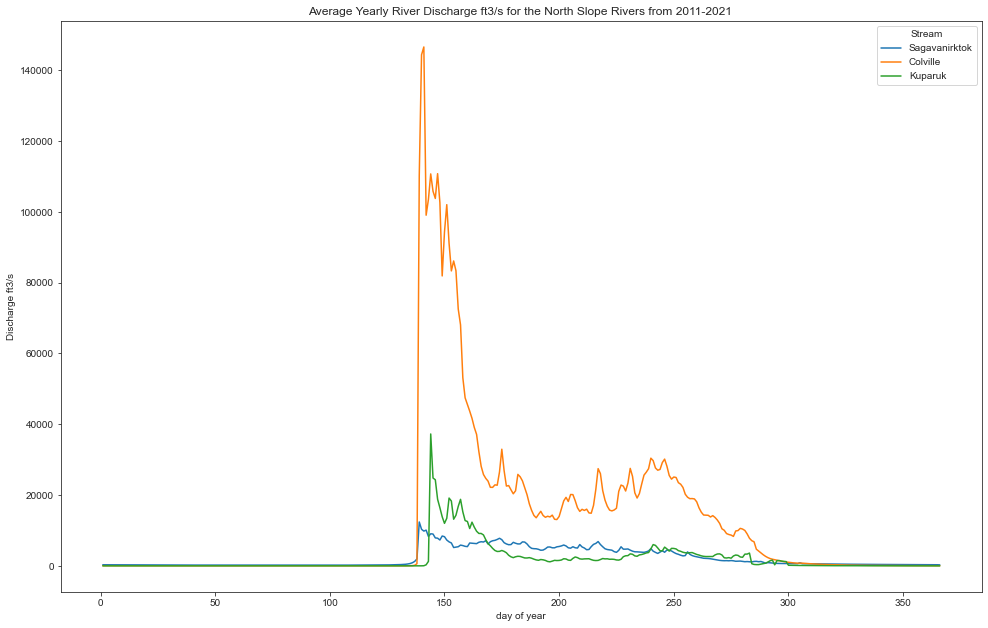

In [197]:
# Month vs. Discharge

# For all North Slope River data 

# Plot day of the year vs. Discharge linegraph 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = River_Dis['day_of_year'],
            y = River_Dis['Discharge ft3/s'],
            data= River_Dis,
            ci = None,
            #palette = 'Spectral',
            hue = River_Dis['Stream'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Average Yearly River Discharge ft3/s for the North Slope Rivers from 2011-2021 ')

plt.show()


/var/folders/ww/h0h0w96s1nd725gvjmt_rgbc0000gn/T/ipykernel_8972/2510909383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Colville_River['year'] = Colville_River['Datetime'].dt.year


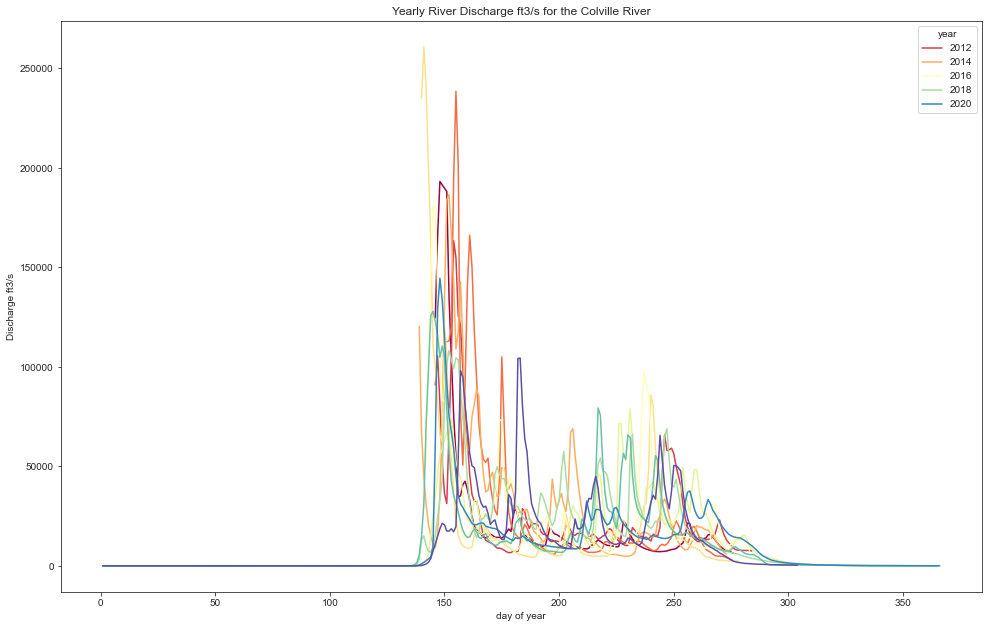

In [198]:
# New df for Colville data 
Colville_River = River_Dis[(River_Dis['Stream']== 'Colville')]
Colville_River['year'] = Colville_River['Datetime'].dt.year


# Plot day of the year vs. Discharge linegraph 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = Colville_River['day_of_year'],
            y = Colville_River['Discharge ft3/s'],
            data= Colville_River,
            ci = None,
            palette = 'Spectral',
            hue = Colville_River['year'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Yearly River Discharge ft3/s for the Colville River')

plt.show()

/var/folders/ww/h0h0w96s1nd725gvjmt_rgbc0000gn/T/ipykernel_8972/2739780503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kup_River['year'] = Kup_River['Datetime'].dt.year


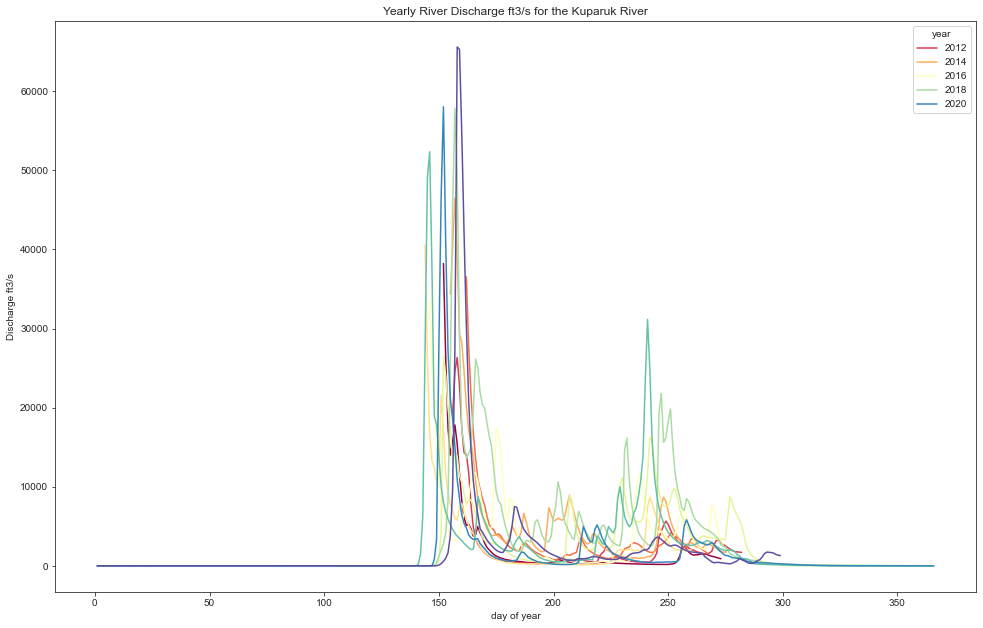

In [199]:
# New df for Kuparuk data 
Kup_River = River_Dis[(River_Dis['Stream'] == 'Kuparuk')]
Kup_River['year'] = Kup_River['Datetime'].dt.year
#Kup_River['day_of_year_mean'] = Kup_River.groupby([Kup_River['day_of_year'], Kup_River['Discharge ft3/s']]).mean()
#Kup_River
                                                   
# Plot day of the year vs. Discharge linegraph 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = Kup_River['day_of_year'],
            y = Kup_River['Discharge ft3/s'],
            data= Kup_River,
            ci = None,
            palette = 'Spectral',
            hue = Kup_River['year'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Yearly River Discharge ft3/s for the Kuparuk River')

plt.show()

/var/folders/ww/h0h0w96s1nd725gvjmt_rgbc0000gn/T/ipykernel_8972/2329168773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sagavanirktok_River['year'] = Sagavanirktok_River['Datetime'].dt.year


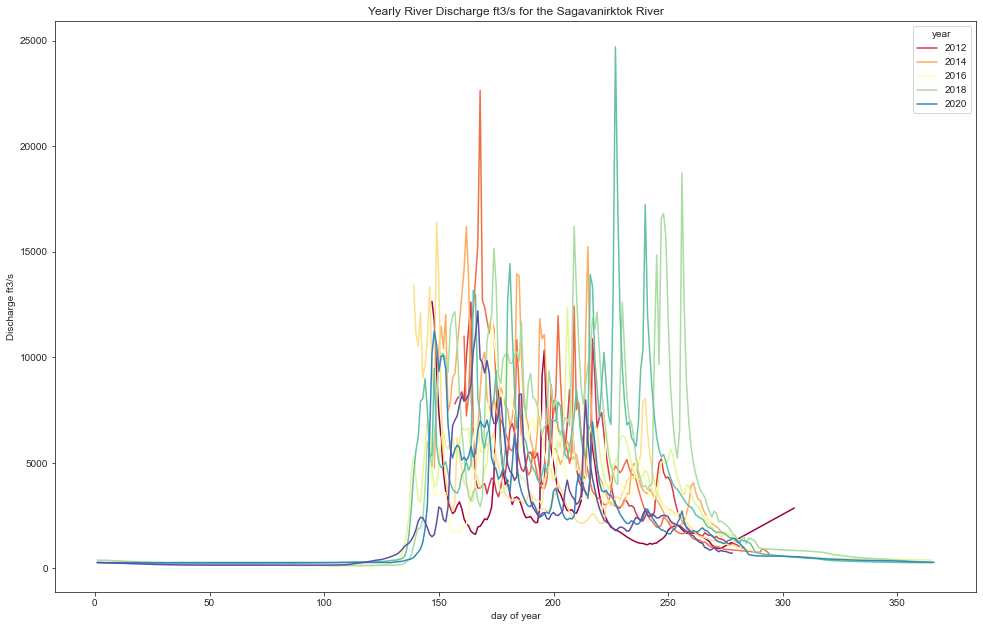

In [200]:
# New df for Sagavanirktok data 
Sagavanirktok_River = River_Dis[(River_Dis['Stream']== 'Sagavanirktok')]
Sagavanirktok_River['year'] = Sagavanirktok_River['Datetime'].dt.year


# Plot day of the year vs. Discharge linegraph 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = Sagavanirktok_River['day_of_year'],
            y = Sagavanirktok_River['Discharge ft3/s'],
            data= Sagavanirktok_River,
            ci = None,
            palette = 'Spectral',
            hue = Sagavanirktok_River['year'])


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('day of year')
plt.ylabel('Discharge ft3/s')
plt.title('Yearly River Discharge ft3/s for the Sagavanirktok River')

plt.show()

In [201]:
Sagavanirktok_River.describe()

,Discharge ft3/s,Unnamed: 2,day_of_year,Spring_Summer,year
count,137895.000000,0.0,140427.000000,140427.000000,140427.000000
mean,4662.638522,NaN,215.499904,0.605959,2016.189493
std,3198.843684,NaN,41.909917,0.488645,3.173912
min,120.000000,NaN,1.000000,0.000000,2011.000000
25%,2330.000000,NaN,182.000000,0.000000,2013.000000
50%,3850.000000,NaN,216.000000,1.000000,2016.000000
75%,6150.000000,NaN,249.000000,1.000000,2019.000000
max,32500.000000,NaN,366.000000,1.000000,2021.000000


In [246]:

print(Barrow_coastal['Chlorophyll_ug/L'].describe())
print(' ')
print(PBay_coastal['Chlorophyll_ug/L'].describe())
print(' ')
print(Yukon_coastal['Chlorophyll_ug/L'].describe())



count    59.000000
mean      2.623232
std       3.463477
min       0.020000
25%       0.515000
50%       1.920000
75%       3.505000
max      19.700000
Name: Chlorophyll_ug/L, dtype: float64
 
count    82.000000
mean      1.965000
std       3.371971
min       0.090000
25%       0.445000
50%       0.875000
75%       2.022500
max      24.860000
Name: Chlorophyll_ug/L, dtype: float64
 
count    7.000000
mean     0.919343
std      1.071489
min      0.179903
25%      0.301278
50%      0.336000
75%      1.242813
max      2.831313
Name: Chlorophyll_ug/L, dtype: float64


## MIN/MAX Discharge


In [203]:
# For river
# for year
# discharge min/max find day of year 

# For River  
River_Dis['year'] = pd.DatetimeIndex(River_Dis['Datetime']).year


River_Dis['Stream'].unique()


array(['Sagavanirktok', 'Colville', 'Kuparuk'], dtype=object)

In [204]:
River_Dis

,Datetime,Discharge ft3/s,Unnamed: 2,Stream,day_of_year,Spring_Summer,year
0,2011-05-27 00:00:00,13200.0,NaN,Sagavanirktok,147,0,2011
1,2011-05-27 00:15:00,13100.0,NaN,Sagavanirktok,147,0,2011
2,2011-05-27 00:30:00,13200.0,NaN,Sagavanirktok,147,0,2011
3,2011-05-27 00:45:00,13100.0,NaN,Sagavanirktok,147,0,2011
4,2011-05-27 01:00:00,13200.0,NaN,Sagavanirktok,147,0,2011
...,...,...,...,...,...,...,...
124656,2021-10-31 22:45:00,NaN,NaN,Kuparuk,304,1,2021
124657,2021-10-31 23:00:00,NaN,NaN,Kuparuk,304,1,2021
124658,2021-10-31 23:15:00,NaN,NaN,Kuparuk,304,1,2021
124659,2021-10-31 23:30:00,NaN,NaN,Kuparuk,304,1,2021


In [205]:
#Sag_River_test = 

In [206]:
# Sag River 
Sag_River = River_Dis.loc[River_Dis['Stream'] == 'Sagavanirktok', ['Datetime','Discharge ft3/s','day_of_year','year','Spring_Summer']]

Sag_River

,Datetime,Discharge ft3/s,day_of_year,year,Spring_Summer
0,2011-05-27 00:00:00,13200.0,147,2011,0
1,2011-05-27 00:15:00,13100.0,147,2011,0
2,2011-05-27 00:30:00,13200.0,147,2011,0
3,2011-05-27 00:45:00,13100.0,147,2011,0
4,2011-05-27 01:00:00,13200.0,147,2011,0
...,...,...,...,...,...
140422,2021-10-31 22:45:00,NaN,304,2021,1
140423,2021-10-31 23:00:00,NaN,304,2021,1
140424,2021-10-31 23:15:00,NaN,304,2021,1
140425,2021-10-31 23:30:00,NaN,304,2021,1


In [207]:
# Sag River 
Sag_River = River_Dis.loc[River_Dis['Stream'] == 'Sagavanirktok', ['Datetime','Discharge ft3/s','day_of_year','year','Spring_Summer']]
Sag_River = Sag_River.dropna()

df_max = Sag_River.groupby(['year','Spring_Summer']).idxmax()
df_max['type'] = 'max'

df2 = df_max.set_index('type',append=True).stack().rename('index')

df3 = pd.concat([ df2.reset_index().drop('year',axis=1).set_index('index'),
                 Sag_River.loc[df2.values]], axis=1 )

df3 = df3.set_index(['year','type','Discharge ft3/s']).sort_index()

# Make MultiIndex into regular index dataframe
Sag_River = df3.reset_index(level = [0,1,2] )

# Drop rows when level_3 = Datetime, day_of_year 
Sag_River = Sag_River[Sag_River["level_3"].str.contains("Datetime")==False]
Sag_River = Sag_River[Sag_River["level_3"].str.contains("day_of_year")==False]

# Drop unneccesary columns
Sag_River = Sag_River.drop(['level_3'], axis = 1)

# Add column for place
Sag_River['River'] = 'Sagavanirktok'
Sag_River['River'] = Sag_River.River.astype(str)

Sag_River

,year,type,Discharge ft3/s,Spring_Summer,Datetime,day_of_year,Spring_Summer,River
4,2011,max,8310.0,1,2011-08-03 16:30:00,215,1,Sagavanirktok
5,2011,max,13800.0,0,2011-05-27 06:00:00,147,0,Sagavanirktok
10,2012,max,12100.0,1,2012-08-04 11:00:00,217,1,Sagavanirktok
11,2012,max,15000.0,0,2012-06-12 03:00:00,164,0,Sagavanirktok
16,2013,max,15000.0,1,2013-07-28 04:30:00,209,1,Sagavanirktok
17,2013,max,32500.0,0,2013-06-17 03:30:00,168,0,Sagavanirktok
22,2014,max,18500.0,0,2014-06-11 12:45:00,162,0,Sagavanirktok
23,2014,max,20500.0,1,2014-08-02 22:15:00,214,1,Sagavanirktok
28,2015,max,9420.0,1,2015-08-27 23:45:00,239,1,Sagavanirktok
29,2015,max,26100.0,0,2015-05-29 17:30:00,149,0,Sagavanirktok


In [208]:
# Colville River 
Colville_River = River_Dis.loc[River_Dis['Stream'] == 'Colville', ['Datetime','Discharge ft3/s','day_of_year','year','Spring_Summer']]

df_max = Colville_River.groupby(['year','Spring_Summer']).idxmax()
df_max['type'] = 'max'

df2 = df_max.set_index('type',append=True).stack().rename('index')

df3 = pd.concat([ df2.reset_index().drop('year',axis=1).set_index('index'),
                 Colville_River.loc[df2.values]], axis=1 )

df3 = df3.set_index(['year','type','Discharge ft3/s']).sort_index()

# Make MultiIndex into regular index dataframe
Colville_River = df3.reset_index(level = [0,1,2] )

# Drop rows when level_3 = Datetime, day_of_year 
Colville_River = Colville_River[Colville_River["level_3"].str.contains("Datetime")==False]
Colville_River = Colville_River[Colville_River["level_3"].str.contains("day_of_year")==False]

# Drop unneccesary columns
Colville_River = Colville_River.drop(['level_3'], axis = 1)

# Add column for place
Colville_River['River'] = 'Colville'
Colville_River['River'] = Colville_River.River.astype(str)

Colville_River

,year,type,Discharge ft3/s,Spring_Summer,Datetime,day_of_year,Spring_Summer,River
4,2011,max,23000.0,1,2011-08-16 12:00:00,228,1,Colville
5,2011,max,212000.0,0,2011-05-28 23:45:00,148,0,Colville
10,2012,max,69300.0,1,2012-09-02 11:15:00,246,1,Colville
11,2012,max,190000.0,0,2012-06-02 18:00:00,154,0,Colville
16,2013,max,23200.0,1,2013-09-08 11:30:00,251,1,Colville
17,2013,max,243000.0,0,2013-06-04 17:00:00,155,0,Colville
22,2014,max,75400.0,1,2014-07-24 20:15:00,205,1,Colville
23,2014,max,195000.0,0,2014-05-31 21:45:00,151,0,Colville
28,2015,max,91000.0,1,2015-08-28 19:45:00,240,1,Colville
29,2015,max,268000.0,0,2015-05-21 15:45:00,141,0,Colville


In [209]:
 # Kuparuk River 
Kuparuk_River = River_Dis.loc[River_Dis['Stream'] == 'Kuparuk', ['Datetime','Discharge ft3/s','day_of_year','year','Spring_Summer']]

df_max = Kuparuk_River.groupby(['year','Spring_Summer']).idxmax()
df_max['type'] = 'max'

df2 = df_max.set_index('type',append=True).stack().rename('index')

df3 = pd.concat([ df2.reset_index().drop('year',axis=1).set_index('index'),
                 Kuparuk_River.loc[df2.values]], axis=1 )

df3 = df3.set_index(['year','type','Discharge ft3/s']).sort_index()

# Make MultiIndex into regular index dataframe
Kuparuk_River = df3.reset_index(level = [0,1,2] )

# Drop rows when level_3 = Datetime, day_of_year 
Kuparuk_River = Kuparuk_River[Kuparuk_River["level_3"].str.contains("Datetime")==False]
Kuparuk_River = Kuparuk_River[Kuparuk_River["level_3"].str.contains("day_of_year")==False]

# Drop unneccesary columns
Kuparuk_River = Kuparuk_River.drop(['level_3'], axis = 1)

# Add column for place
Kuparuk_River['River'] = 'Kuparuk'
Kuparuk_River['River'] = Kuparuk_River.River.astype(str)

Kuparuk_River

,year,type,Discharge ft3/s,Spring_Summer,Datetime,day_of_year,Spring_Summer,River
4,2011,max,2650.0,1,2011-09-14 07:30:00,257,1,Kuparuk
5,2011,max,44300.0,0,2011-06-01 00:00:00,152,0,Kuparuk
10,2012,max,6100.0,1,2012-09-05 10:45:00,249,1,Kuparuk
11,2012,max,27200.0,0,2012-06-06 04:45:00,158,0,Kuparuk
16,2013,max,4280.0,1,2013-09-08 14:30:00,251,1,Kuparuk
17,2013,max,41900.0,0,2013-06-11 00:00:00,162,0,Kuparuk
22,2014,max,9270.0,1,2014-07-26 12:00:00,207,1,Kuparuk
23,2014,max,48000.0,0,2014-06-06 10:45:00,157,0,Kuparuk
28,2015,max,8890.0,1,2015-08-30 02:45:00,242,1,Kuparuk
29,2015,max,52900.0,0,2015-05-24 00:00:00,144,0,Kuparuk


In [210]:
Min_Max_River_Data.dtypes

year                        int64
type                       object
Discharge ft3/s           float64
Spring_Summer               int64
Datetime           datetime64[ns]
day_of_year                 int64
Spring_Summer               int64
River                      object
Spring_Colville             int64
dtype: object

In [211]:
# Combined Min/Max River Dataset

Min_Max_River_Data = pd.DataFrame()

places = [Colville_River, Kuparuk_River, Sag_River]

Min_Max_River_Data = pd.concat(places)

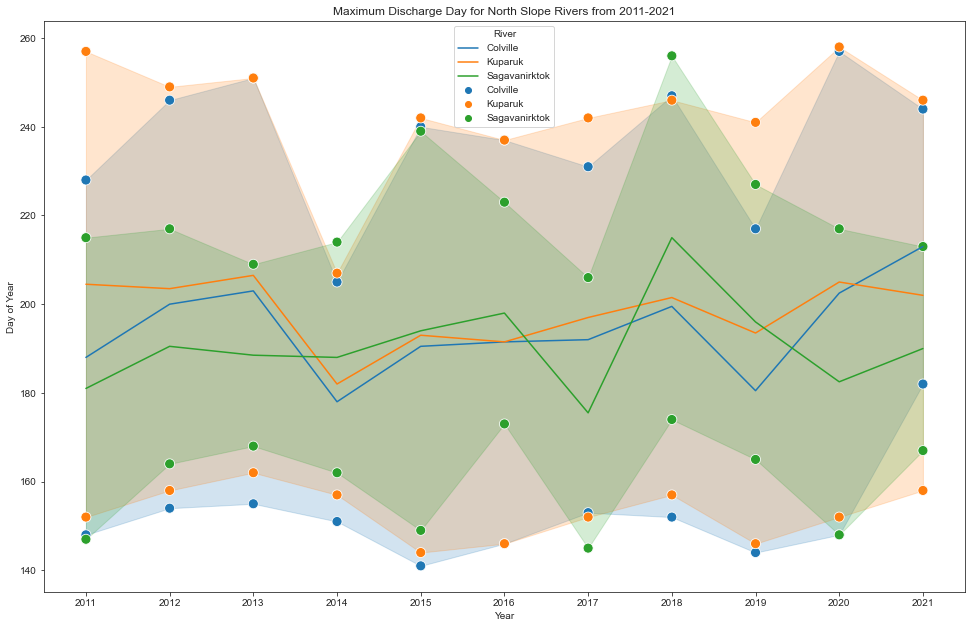

In [212]:
# Plot: year vs. day of year 



sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)


ax = sns.lineplot(x = Min_Max_River_Data['year'], y = Min_Max_River_Data['day_of_year'], hue= Min_Max_River_Data['River'],legend = True)
                  #,ci= None)

ax = sns.scatterplot(x = Min_Max_River_Data['year'],
            y = Min_Max_River_Data['day_of_year'],
            #data= River_Dis,
            #ci = None,
            s = 100,
            #palette = 'Spectral',
            hue = Min_Max_River_Data['River'],
            )


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

plt.xticks([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])        
plt.xlabel('Year')
plt.ylabel('Day of Year')
plt.title('Maximum Discharge Day for North Slope Rivers from 2011-2021')
plt.show()



Looking at the maximum discharge days for the Northslope between 2011-2021 ( USGS data), we see the trends for the timing of each river's spring freshet and summer precipitation peak. In general, there is no clear trend as to whether the timing of the spring or freshnet has been starting early/later between 2011-2021. 

Spring freshnet = Highest Discharge 
B

In [213]:
Prudhoe_Bay
Prudhoe_Bay['day_of_year'] = pd.DatetimeIndex(Prudhoe_Bay['Date']).day_of_year

/var/folders/ww/h0h0w96s1nd725gvjmt_rgbc0000gn/T/ipykernel_8972/1598904831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prudhoe_Bay['day_of_year'] = pd.DatetimeIndex(Prudhoe_Bay['Date']).day_of_year


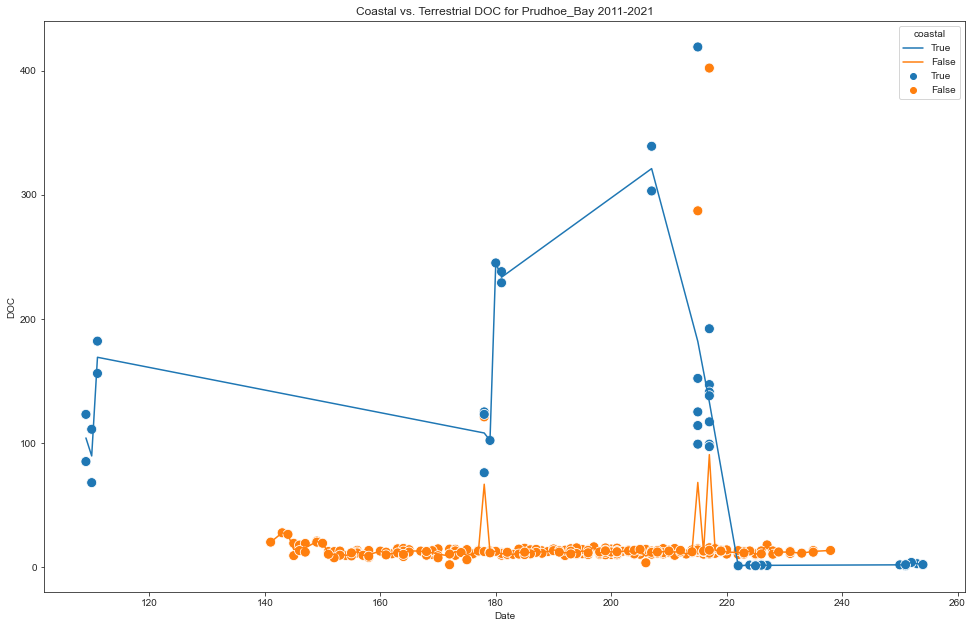

In [214]:
# Day of year vs Coastal vs. Terrestrial DOC for Prudhoe_Bay 2011-2021

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)


ax = sns.lineplot(x = Prudhoe_Bay['day_of_year'], y = Prudhoe_Bay['DOC'], hue= Prudhoe_Bay['coastal'], legend = True,ci= None)
ax = sns.scatterplot(x = Prudhoe_Bay['day_of_year'],
            y = Prudhoe_Bay['DOC'],
            #data= River_Dis,
            ci = None,
            s = 100,
            #palette = 'Spectral',
            hue = Prudhoe_Bay['coastal'],
            )


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([0,365])        
plt.xlabel('Date')
plt.ylabel('DOC')
plt.title('Coastal vs. Terrestrial DOC for Prudhoe_Bay 2011-2021')
plt.show()


In [215]:
Min_Max_River_Data # River = different shape 

,year,type,Discharge ft3/s,Spring_Summer,Datetime,day_of_year,Spring_Summer,River
4,2011,max,23000.0,1,2011-08-16 12:00:00,228,1,Colville
5,2011,max,212000.0,0,2011-05-28 23:45:00,148,0,Colville
10,2012,max,69300.0,1,2012-09-02 11:15:00,246,1,Colville
11,2012,max,190000.0,0,2012-06-02 18:00:00,154,0,Colville
16,2013,max,23200.0,1,2013-09-08 11:30:00,251,1,Colville
...,...,...,...,...,...,...,...,...
53,2019,max,28600.0,1,2019-08-15 15:00:00,227,1,Sagavanirktok
58,2020,max,7370.0,1,2020-08-04 14:30:00,217,1,Sagavanirktok
59,2020,max,11300.0,0,2020-05-27 20:01:00,148,0,Sagavanirktok
64,2021,max,9620.0,1,2021-08-01 22:00:00,213,1,Sagavanirktok


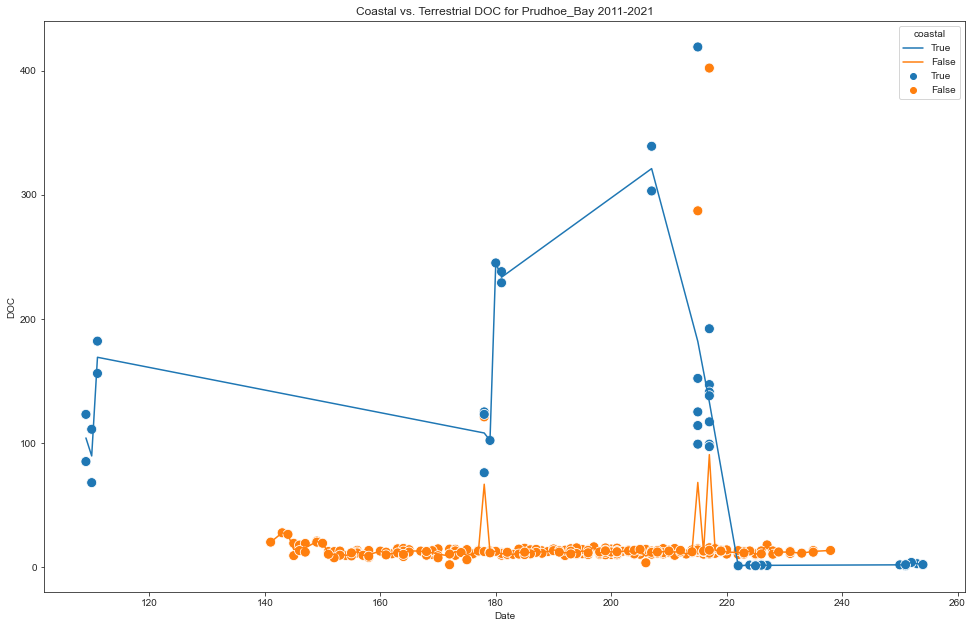

In [216]:
# Day of year vs Coastal vs. Terrestrial DOC for Prudhoe_Bay 2011-2021

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)


ax = sns.lineplot(x = Prudhoe_Bay['day_of_year'], y = Prudhoe_Bay['DOC'], hue= Prudhoe_Bay['coastal'], legend = True,ci= None)
ax = sns.scatterplot(x = Prudhoe_Bay['day_of_year'],
            y = Prudhoe_Bay['DOC'],
            #data= River_Dis,
            ci = None,
            s = 100,
            #palette = 'Spectral',
            hue = Prudhoe_Bay['coastal'],
            )


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([0,365])        
plt.xlabel('Date')
plt.ylabel('DOC')
plt.title('Coastal vs. Terrestrial DOC for Prudhoe_Bay 2011-2021')
plt.show()


In [217]:
Prudhoe_Bay

,Latitude,Longitude,Ammonia-nitrogen,Chlorophyll a,"Chlorophyll a, corrected for pheophytin",Chlorophyll b,Chlorophyll c,Conductivity,Inorganic nitrogen (nitrate and nitrite),Kjeldahl nitrogen,...,ag597,ag598,ag599,ag600,Discharge_avg/day,a300-DOC,Place_1,Stream_1,coastal,day_of_year
285,70.438220,-148.329800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.266200,3,NaN,True,224
286,70.371130,-147.805900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.125640,3,NaN,True,225
287,70.272420,-147.152600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.373007,3,NaN,True,225
288,70.205220,-146.661700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.460716,3,NaN,True,225
289,70.232120,-146.220300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.403471,3,NaN,True,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348147,70.398736,-148.529440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0,True,179
348148,70.398752,-148.529600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0,True,179
348149,70.398728,-148.529520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0,True,179
348150,70.398808,-148.529360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0,True,179


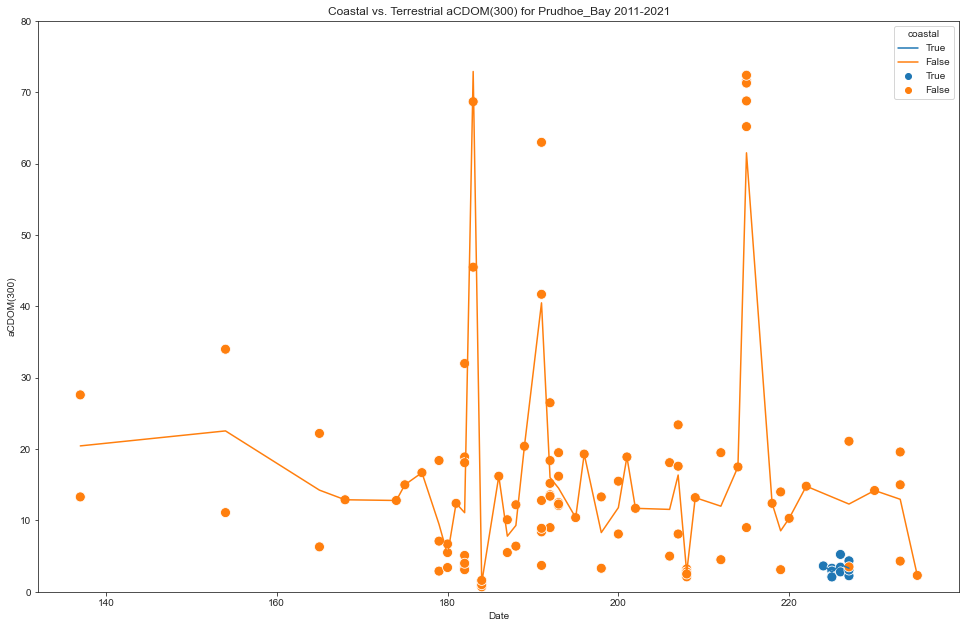

In [223]:
# Day of year vs Coastal vs. Terrestrial aCDOM(300) for Prudhoe_Bay 2011-2021

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)


ax = sns.lineplot(x = Prudhoe_Bay['day_of_year'], y = Prudhoe_Bay['a300'], hue= Prudhoe_Bay['coastal'], legend = True,ci= None)
ax = sns.scatterplot(x = Prudhoe_Bay['day_of_year'],
            y = Prudhoe_Bay['a300'],
            #data= River_Dis,
            ci = None,
            s = 100,
            #palette = 'Spectral',
            hue = Prudhoe_Bay['coastal'],
            )


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

ax.set(ylim=(0,80))       
plt.xlabel('Date')
plt.ylabel('aCDOM(300)')
plt.title('Coastal vs. Terrestrial aCDOM(300) for Prudhoe_Bay 2011-2021')
plt.show()


In [220]:
Prudhoe_Bay.columns

Index(['Latitude', 'Longitude', 'Ammonia-nitrogen', 'Chlorophyll a',
       'Chlorophyll a, corrected for pheophytin', 'Chlorophyll b',
       'Chlorophyll c', 'Conductivity',
       'Inorganic nitrogen (nitrate and nitrite)', 'Kjeldahl nitrogen',
       ...
       'ag597', 'ag598', 'ag599', 'ag600', 'Discharge_avg/day', 'a300-DOC',
       'Place_1', 'Stream_1', 'coastal', 'day_of_year'],
      dtype='object', length=1184)

In [54]:
# Testing

In [56]:
Min_Max_River_Data

,year,type,Discharge ft3/s,Spring_Summer,Datetime,day_of_year,Spring_Summer,River
4,2011,max,23000.0,1,2011-08-16 12:00:00,228,1,Colville
5,2011,max,212000.0,0,2011-05-28 23:45:00,148,0,Colville
10,2012,max,69300.0,1,2012-09-02 11:15:00,246,1,Colville
11,2012,max,190000.0,0,2012-06-02 18:00:00,154,0,Colville
16,2013,max,23200.0,1,2013-09-08 11:30:00,251,1,Colville
...,...,...,...,...,...,...,...,...
53,2019,max,28600.0,1,2019-08-15 15:00:00,227,1,Sagavanirktok
58,2020,max,7370.0,1,2020-08-04 14:30:00,217,1,Sagavanirktok
59,2020,max,11300.0,0,2020-05-27 20:01:00,148,0,Sagavanirktok
64,2021,max,9620.0,1,2021-08-01 22:00:00,213,1,Sagavanirktok


In [146]:
Min_Max_River_Data.describe()

,year,Discharge ft3/s,Spring_Summer,day_of_year,Spring_Summer,Spring_Colville
count,66.00000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2016.00000,55062.727273,0.500000,194.469697,0.500000,194.469697
std,3.18651,62315.821859,0.503831,41.931526,0.503831,41.931526
min,2011.00000,2650.000000,0.000000,141.000000,0.000000,141.000000
25%,2013.00000,13175.000000,0.000000,152.250000,0.000000,152.250000
50%,2016.00000,27900.000000,0.500000,193.500000,0.500000,193.500000
75%,2019.00000,72150.000000,1.000000,238.500000,1.000000,238.500000
max,2021.00000,268000.000000,1.000000,258.000000,1.000000,258.000000


In [87]:
River_Data_new = Min_Max_River_Data
River_Data_new

,year,type,Discharge ft3/s,Spring_Summer,Datetime,day_of_year,Spring_Summer,River
4,2011,max,23000.0,1,2011-08-16 12:00:00,228,1,Colville
5,2011,max,212000.0,0,2011-05-28 23:45:00,148,0,Colville
10,2012,max,69300.0,1,2012-09-02 11:15:00,246,1,Colville
11,2012,max,190000.0,0,2012-06-02 18:00:00,154,0,Colville
16,2013,max,23200.0,1,2013-09-08 11:30:00,251,1,Colville
...,...,...,...,...,...,...,...,...
53,2019,max,28600.0,1,2019-08-15 15:00:00,227,1,Sagavanirktok
58,2020,max,7370.0,1,2020-08-04 14:30:00,217,1,Sagavanirktok
59,2020,max,11300.0,0,2020-05-27 20:01:00,148,0,Sagavanirktok
64,2021,max,9620.0,1,2021-08-01 22:00:00,213,1,Sagavanirktok


In [88]:
# Adding Min_Max_River_Data['day_of_year'] to Prudhoe_Bay df


# When River = Colville, Spring_summer = 0, data = Discharge 

# groupby  by long lat and parameter name, keeping everything in filter 
#River_Data_new = Min_Max_River_Data.filter(['year', 'Discharge ft3/s', 'Datetime','day_of_year','River','Spring_Summer']).groupby(['River','Spring_Summer']).reset_index()

# Create columns 

#River_Data_new = pd.concat([River_Data_new,Min_Max_River_Data['Spring_Summer']])
#River_Data_new['year'] = Min_Max_River_Data['year'].reset_index()
#River_Data_new = Min_Max_River_Data['Spring_Summer']#.reset_index()

#River_Data_new = River_Data_new.pivot(columns= 'River', index=['year'],values = 'day_of_year')

#River_Data_new = Min_Max_River_Data.loc[Min_Max_River_Data['Stream'] == 'Kuparuk', ['Datetime','Discharge ft3/s','day_of_year','year','Spring_Summer']]





#df['Age Group'] = np.select(conditions, values)
River_Data_new['Spring_Colville'] = River_Data_new.loc[(River_Data_new['Spring_Summer'] == 0) & (River_Data_new['River'] == 'Colville')] = River_Data_new['day_of_year']

#River_Data_new['Spring_Colville'] = Min_Max_River_Data.loc[((Min_Max_River_Data.Spring_Summer == 0) & (Min_Max_River_Data.River == 'Colville'))]

#River_Data_new['Spring_Sag']
#River_Data_new['Summer_Sag']

#River_Data_new['Spring_Kup']
#River_Data_new['Summer_Kup']


#df.loc[df[‘column’] condition, ‘new column name’] = ‘value if condition is met’

#df['Age Category'] = 'Over 30'
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'



#Help = Min_Max_River_Data.pivot(columns = 'River',index = ['year','Spring_Summer'], values = 'day_of_year').reset_index()
#Bowden_1978_2019 = New_dataframe.pivot(columns= 'Type', index=['Date', 'Latitude', 'Longitude'], values = 'Value').reset_index()

River_Data_new

ValueError: cannot reindex from a duplicate axis

In [127]:
River_Dis

,Datetime,Discharge ft3/s,Unnamed: 2,Stream,day_of_year,Spring_Summer,year
0,2011-05-27 00:00:00,13200.0,NaN,Sagavanirktok,147,0,2011
1,2011-05-27 00:15:00,13100.0,NaN,Sagavanirktok,147,0,2011
2,2011-05-27 00:30:00,13200.0,NaN,Sagavanirktok,147,0,2011
3,2011-05-27 00:45:00,13100.0,NaN,Sagavanirktok,147,0,2011
4,2011-05-27 01:00:00,13200.0,NaN,Sagavanirktok,147,0,2011
...,...,...,...,...,...,...,...
124656,2021-10-31 22:45:00,NaN,NaN,Kuparuk,304,1,2021
124657,2021-10-31 23:00:00,NaN,NaN,Kuparuk,304,1,2021
124658,2021-10-31 23:15:00,NaN,NaN,Kuparuk,304,1,2021
124659,2021-10-31 23:30:00,NaN,NaN,Kuparuk,304,1,2021


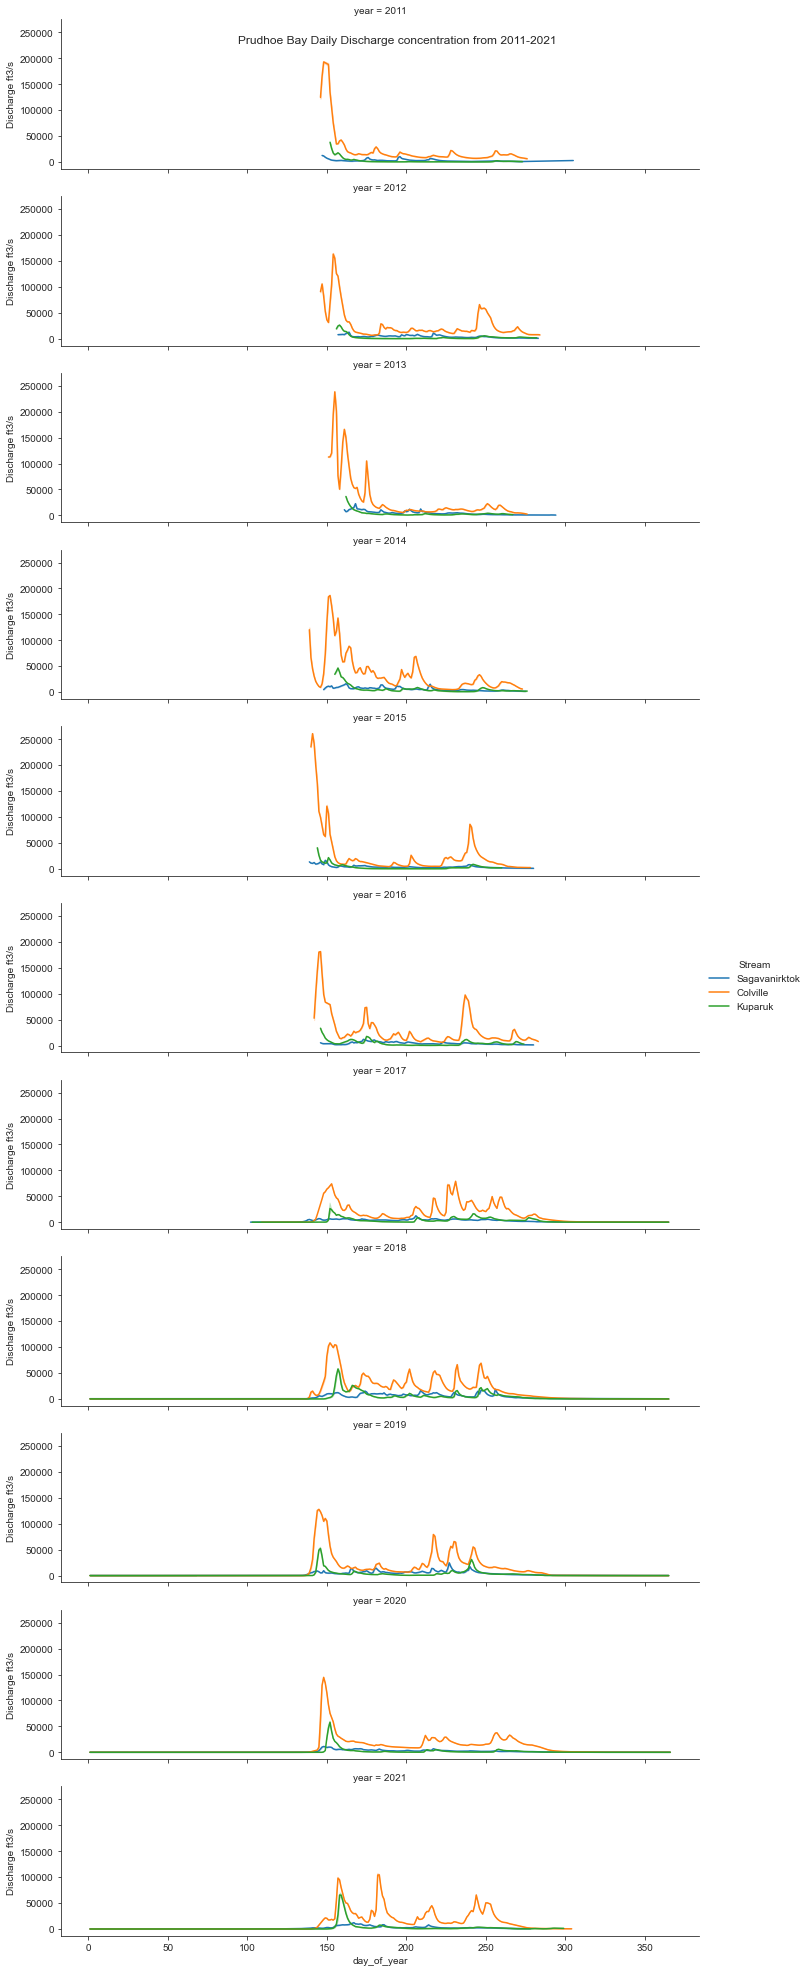

In [147]:
## PLOT:Prudhoe Bay Daily Discharge concentration from 2011-2021


g = sns.FacetGrid(River_Dis, row='year', 
                  row_order = River_Dis['year'].unique().sort(),
                  height=2.5, aspect=4, hue = 'Stream')
#g.map_dataframe(sns.scatterplot, x=Prudhoe_Bay["day_of_year"], y=Prudhoe_Bay["DOC"])
g.map(sns.lineplot, "day_of_year", "Discharge ft3/s")
g.fig.suptitle('Prudhoe Bay Daily Discharge concentration from 2011-2021')

#def vertical_mean_line_survived(Min_Max_River_Data, **kwargs):
#    ls = {"0":"-","1":"--"}
#    plt.axvline(Min_Max_River_Data.values(), linestyle =ls[kwargs.get("label","0")], 
#                color = kwargs.get("color", "g"))
   
#g.map(vertical_mean_line_survived, Min_Max_River_Data) 

g.add_legend()
#g.fig.suptitle('Prudhoe Bay Daily Discharge concentration from 2011-2022')
#g.refline(x=River_Dis["Discharge ft3/s"].max(),linewidth=2, linestyle="-", clip_on=False,color = 'red')
#g.map(plt.axhline, River_Dis.loc["Discharge ft3/s"].max(), linewidth=2, linestyle="-", clip_on=False,color = 'red')




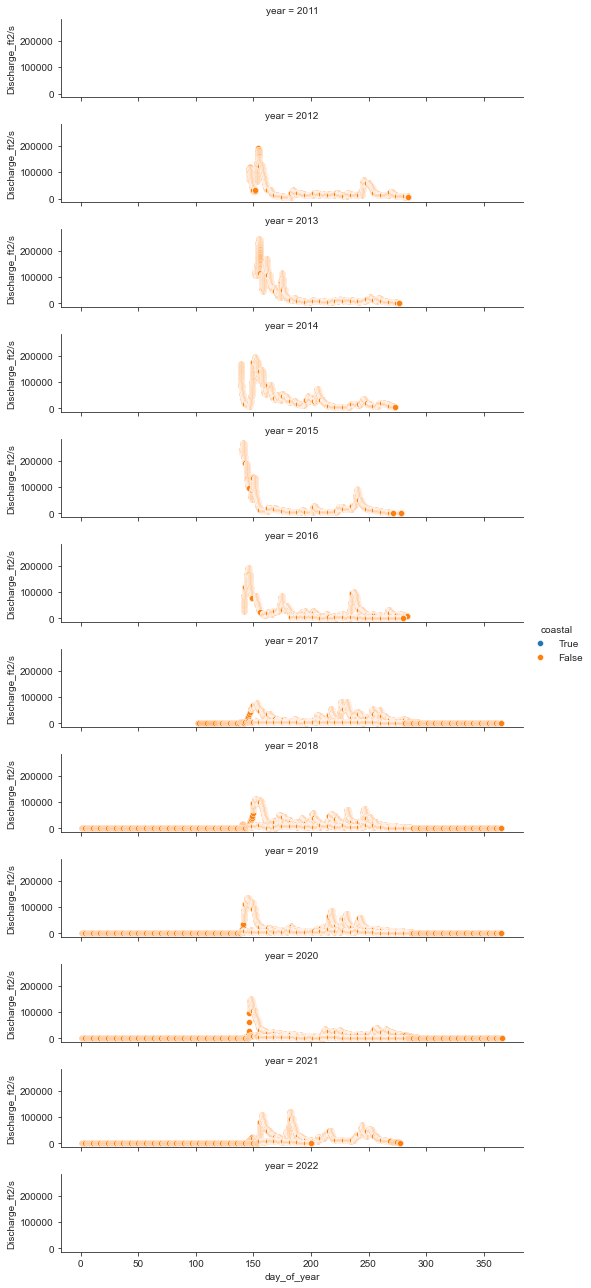

In [106]:
## PLOT: Prudhoe Bay Daily DOC concentration from 2011-2022

g = sns.FacetGrid(Prudhoe_Bay, row='year', 
                  row_order = Prudhoe_Bay['year'].unique().sort(),
                  height=1.5, aspect=5, hue = 'coastal')
#g.map_dataframe(sns.scatterplot, x=Prudhoe_Bay["day_of_year"], y=Prudhoe_Bay["DOC"])
g.map(sns.scatterplot, "day_of_year", "Discharge_ft2/s")

#def vertical_mean_line_survived(Min_Max_River_Data, **kwargs):
#    ls = {"0":"-","1":"--"}
#    plt.axvline(Min_Max_River_Data.values(), linestyle =ls[kwargs.get("label","0")], 
#                color = kwargs.get("color", "g"))
   
#g.map(vertical_mean_line_survived, Min_Max_River_Data) 

g.add_legend()
g.fig.suptitle('Prudhoe Bay Daily Discharge concentration from 2011-2022')
#g.refline(x=Min_Max_River_Data["day_of_year"])
#g.map(plt.axhline, y=Min_Max_River_Data["Discharge ft3/s"].values(), linewidth=2, linestyle="-", clip_on=False,color = 'red')




Text(0.5, 0.98, 'Prudhoe Bay Daily DOC concentration from 2011-2022')

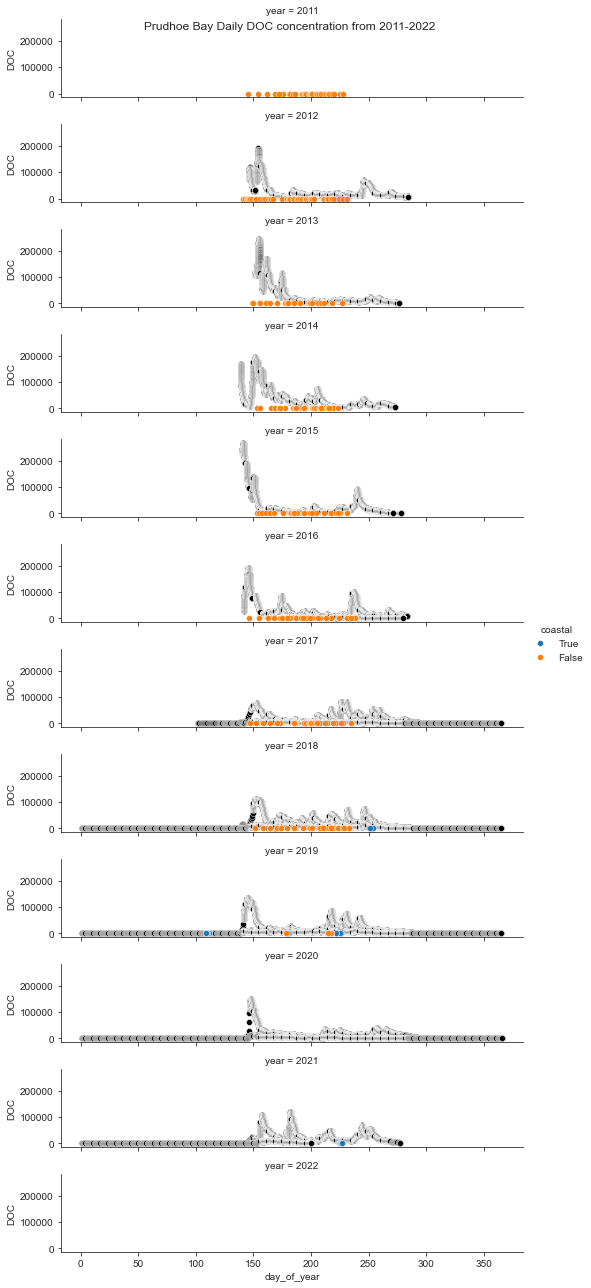

In [137]:
## PLOT: Prudhoe Bay Daily DOC concentration from 2011-2022

g = sns.FacetGrid(Prudhoe_Bay, row='year', 
                  row_order = Prudhoe_Bay['year'].unique().sort(),
                  height=1.5, aspect=5, hue = 'coastal')

g.map(sns.scatterplot, "day_of_year", "Discharge_ft2/s", color = 'black')
g.map(sns.scatterplot, "day_of_year", "DOC")

#def vertical_mean_line_survived(Min_Max_River_Data, **kwargs):
#    ls = {"0":"-","1":"--"}
#    plt.axvline(Min_Max_River_Data.values(), linestyle =ls[kwargs.get("label","0")], 
#                color = kwargs.get("color", "g"))
   
#g.map(vertical_mean_line_survived, Min_Max_River_Data) 

g.add_legend()
#g.set(ylim=(0,500))
g.fig.suptitle('Prudhoe Bay Daily DOC concentration from 2011-2022')
#g.refline(x=Min_Max_River_Data["day_of_year"])
#g.map(plt.axhline, y=Min_Max_River_Data["Discharge ft3/s"].values(), linewidth=2, linestyle="-", clip_on=False,color = 'red')




Text(0.5, 0.98, 'Prudhoe Bay Daily Chlorophyll concentration from 2011-2022')

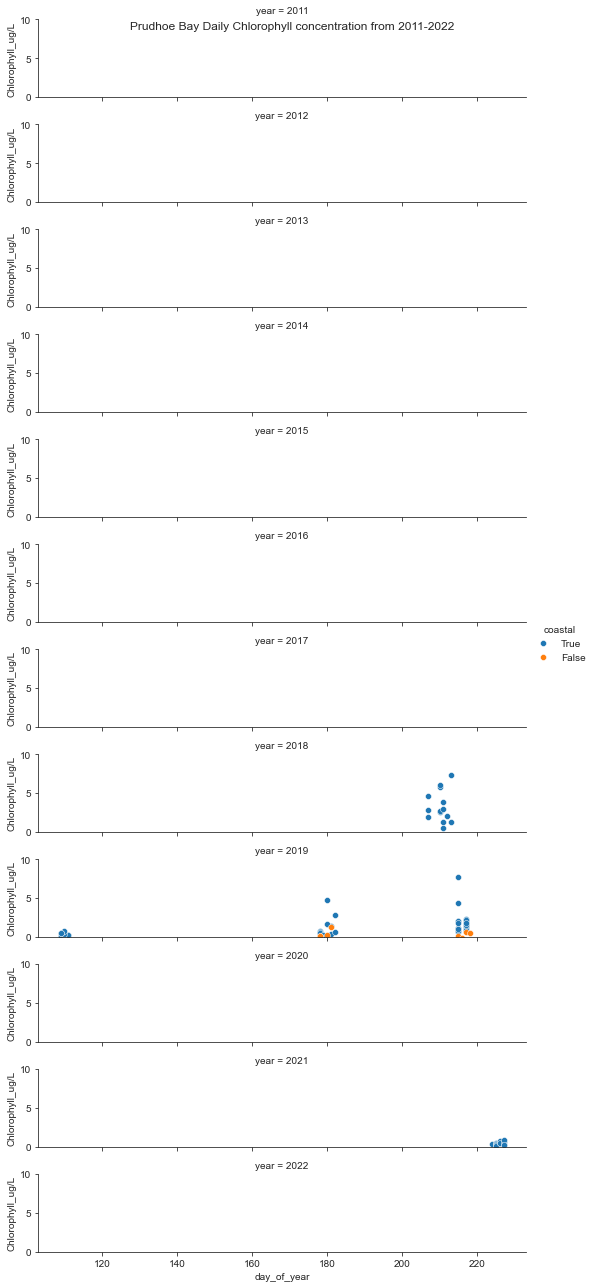

In [122]:
## PLOT: Prudhoe Bay Daily Chlorophyll concentration from 2011-2022

g = sns.FacetGrid(Prudhoe_Bay, row='year', 
                  row_order = Prudhoe_Bay['year'].unique().sort(),
                  height=1.5, aspect=5, hue = 'coastal')
#g.map_dataframe(sns.scatterplot, x=Prudhoe_Bay["day_of_year"], y=Prudhoe_Bay["DOC"])
g.map(sns.scatterplot, "day_of_year", "Chlorophyll_ug/L")

#def vertical_mean_line_survived(Min_Max_River_Data, **kwargs):
#    ls = {"0":"-","1":"--"}
#    plt.axvline(Min_Max_River_Data.values(), linestyle =ls[kwargs.get("label","0")], 
#                color = kwargs.get("color", "g"))
   
#g.map(vertical_mean_line_survived, Min_Max_River_Data) 

g.add_legend()
g.set(ylim=(0,10))
g.fig.suptitle('Prudhoe Bay Daily Chlorophyll concentration from 2011-2022')
#g.refline(x=Min_Max_River_Data["day_of_year"])
#g.map(plt.axhline, y=Min_Max_River_Data["Discharge ft3/s"].values(), linewidth=2, linestyle="-", clip_on=False,color = 'red')




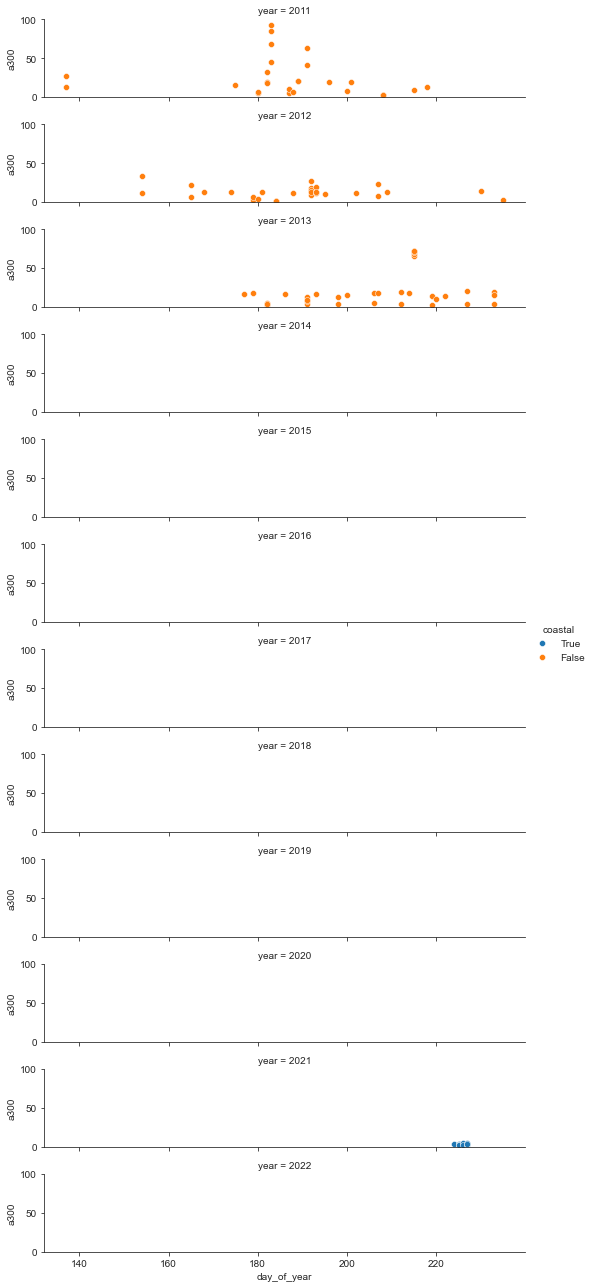

In [105]:
g = sns.FacetGrid(Prudhoe_Bay, row='year', 
                  row_order = Prudhoe_Bay['year'].unique().sort(),
                  height=1.5, aspect=5, hue = 'coastal')
#g.map_dataframe(sns.scatterplot, x=Prudhoe_Bay["day_of_year"], y=Prudhoe_Bay["DOC"])
g.map(sns.scatterplot, "day_of_year", "a300")

#def vertical_mean_line_survived(Min_Max_River_Data, **kwargs):
#    ls = {"0":"-","1":"--"}
#    plt.axvline(Min_Max_River_Data.values(), linestyle =ls[kwargs.get("label","0")], 
#                color = kwargs.get("color", "g"))
   
#g.map(vertical_mean_line_survived, Min_Max_River_Data) 

g.add_legend()
g.set(ylim=(0,100))




In [96]:
list(Prudhoe_Bay.columns)

['Latitude',
 'Longitude',
 'Ammonia-nitrogen',
 'Chlorophyll a',
 'Chlorophyll a, corrected for pheophytin',
 'Chlorophyll b',
 'Chlorophyll c',
 'Conductivity',
 'Inorganic nitrogen (nitrate and nitrite)',
 'Kjeldahl nitrogen',
 'Nitrate + Nitrite',
 'Organic carbon',
 'Pheophytin a',
 'Phosphorus',
 'Total Nitrogen, mixed forms',
 'Station',
 'Place',
 'Depth m',
 'fDOM QSU',
 'ODO mg/L',
 'BGA PE ug/L',
 'Turbidity FNU',
 'pH',
 'Temp ∞C',
 'S275:295',
 'S350:400',
 'S270:700',
 'a300',
 'ag250.0',
 'ag251.0',
 'ag252.0',
 'ag253.0',
 'ag254.0',
 'ag255.0',
 'ag256.0',
 'ag257.0',
 'ag258.0',
 'ag259.0',
 'ag260.0',
 'ag261.0',
 'ag262.0',
 'ag263.0',
 'ag264.0',
 'ag265.0',
 'ag266.0',
 'ag267.0',
 'ag268.0',
 'ag269.0',
 'ag270.0',
 'ag271.0',
 'ag272.0',
 'ag273.0',
 'ag274.0',
 'ag275.0',
 'ag276.0',
 'ag277.0',
 'ag278.0',
 'ag279.0',
 'ag280.0',
 'ag281.0',
 'ag282.0',
 'ag283.0',
 'ag284.0',
 'ag285.0',
 'ag286.0',
 'ag287.0',
 'ag288.0',
 'ag289.0',
 'ag290.0',
 'ag291.0',


In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:>

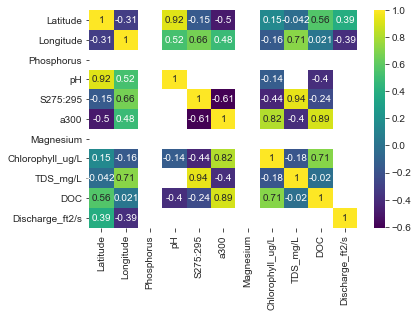

In [117]:
#list(Prudhoe_Bay.columns)

important_variables = [ 'Latitude','Longitude','Phosphorus','pH','S275:295','a300',
                       'Magnesium','Chlorophyll_ug/L','TDS_mg/L','DOC','Discharge_ft2/s','coastal']


Prudhoe_Bay_little = Prudhoe_Bay[important_variables]


sns.heatmap(Prudhoe_Bay_little.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:>

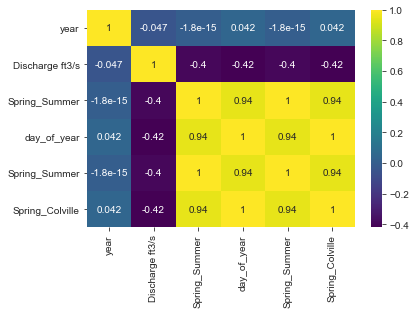

In [118]:
sns.heatmap(Min_Max_River_Data.corr(), annot = True, cmap = 'viridis')

In [458]:
# Arctic no NAN data
Arctic_all_noNaN = (Prud_Bay_ALL.dropna(subset=['Date'], how='all'))
# Process dataset
Arctic_all_noNaN['Date'] = pd.to_datetime(Arctic_all_noNaN['Date'])
Arctic_all_noNaN['Salinity_psu'] = pd.to_numeric(Arctic_all_noNaN['Salinity_psu'])

In [ ]:
August = Prud_Bay_ALL[(Prud_Bay_ALL['month']== 8)]

In [ ]:
August = Prud_Bay_ALL[(Prud_Bay_ALL['year']== 2021)]

In [459]:
Arctic_all_noNaN['Stream'].unique()

array([nan, 'Colville', 'Kuparuk', 'Sagavanirtok'], dtype=object)

In [ ]:
#'Chlorophyll a',
#'Chlorophyll a, corrected for pheophytin'
    
# X axis = Prudhoe_Bay_ latitude low->high
# Y axis = Nutrients 


x = ARCTIC_ALL['Date']
y = ARCTIC_ALL['Chlorophyll a']
y2 = ARCTIC_ALL['Chlorophyll a, corrected for pheophytin']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Chlorophyll a')
ax1.scatter(x,y2, s=10, c='r', marker="o", label='Chlorophyll a, corrected for pheophytin')
plt.legend(loc='upper left');
plt.xticks(rotation = 25)
plt.show()

In [202]:
# Colville Stream data
colville = Arctic_all_noNaN
colville = colville[colville['Stream'] == 'Colville']

colville

NameError: name 'Arctic_all_noNaN' is not defined

NameError: name 'colville' is not defined

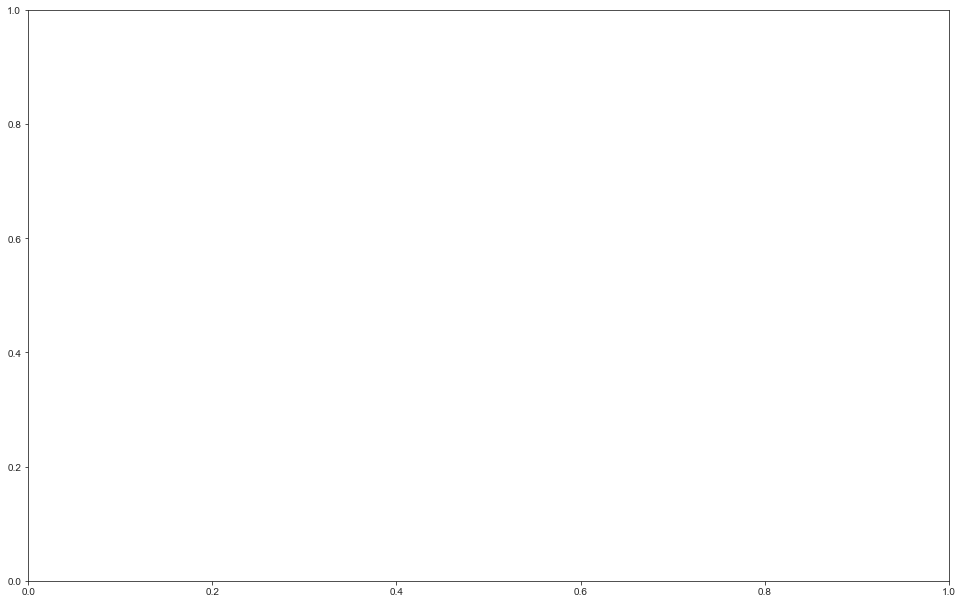

In [201]:
# X axis = Prudhoe_Bay_ latitude low->high
# Y axis = Nutrients 

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = colville['month'],
            y = colville['Discharge_ft2/s'],
            data= colville,
            ci = None,
            palette = 'Spectral',
            hue = colville['year']).set(title='Colville River Discharge_ft2/s')


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('Month')
plt.ylabel('Discharge_ft2/s')
plt.title('Colville River Discharge_ft2/s')

plt.show()

In [ ]:
# Kuparuk Stream data
Kuparuk = Arctic_all_noNaN
Kuparuk = Kuparuk[Kuparuk['Stream'] == 'Kuparuk']

Kuparuk

In [ ]:
# X axis = Prudhoe_Bay_ latitude low->high
# Y axis = Nutrients 

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = Kuparuk['month'],
            y = Kuparuk['Discharge_ft2/s'],
            data= Kuparuk,
            ci = None,
            palette = 'Spectral',
            hue = Kuparuk['year']).set(title='Colville River Discharge_ft2/s')


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('Month')
plt.ylabel('Discharge_ft2/s')
plt.title('Kuparuk River Discharge_ft2/s')

plt.show()

In [446]:
# Sag Stream data
Sagavanirtok = Arctic_all_noNaN
Sagavanirtok = Sagavanirtok[Sagavanirtok['Stream'] == 'Sagavanirtok']

Sagavanirtok

NameError: name 'Arctic_all_noNaN' is not defined

In [ ]:
# X axis = Prudhoe_Bay_ latitude low->high
# Y axis = Nutrients 

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = Sagavanirtok['month'],
            y = Sagavanirtok['Discharge_ft2/s'],
            data= Sagavanirtok,
            ci = None,
            palette = 'Spectral',
            hue = Sagavanirtok['year']).set(title='Colville River Discharge_ft2/s')


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('Month')
plt.ylabel('Discharge_ft2/s')
plt.title('Sagavanirtok River Discharge_ft2/s')

plt.show()

NameError: name 'Arctic_all_noNaN' is not defined

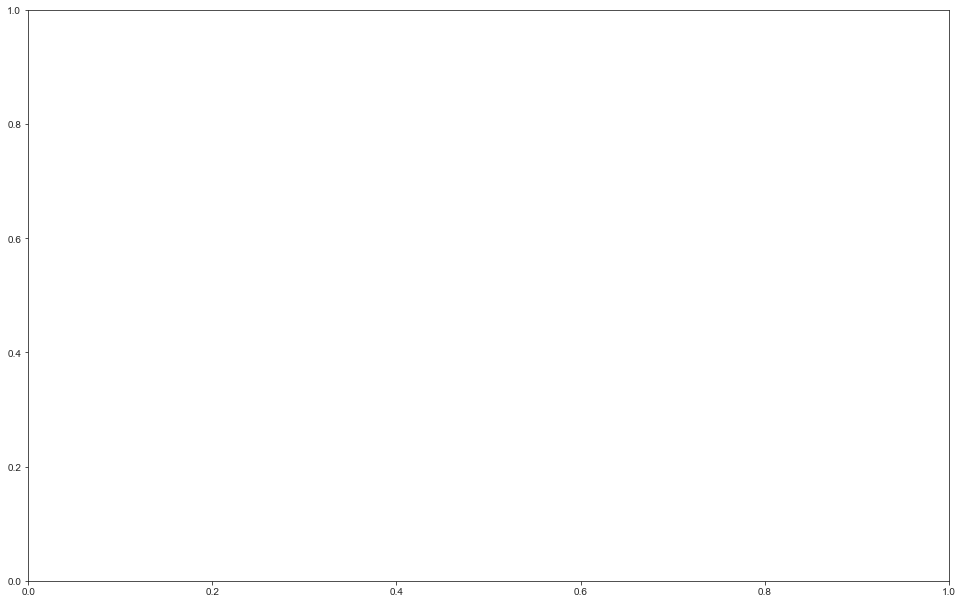

In [447]:
# X axis = Prudhoe_Bay_ latitude low->high
# Y axis = Nutrients 

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.lineplot(x = Arctic_all_noNaN['month'],
            y = Arctic_all_noNaN['Discharge_ft2/s'],
            data= Arctic_all_noNaN,
            ci = None,
            palette = 'Spectral',
            hue = Arctic_all_noNaN['Stream']).set(title='Colville River Discharge_ft2/s')


ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate() # Rotation

# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()

#plt.xticks([1,12])        
plt.xlabel('Month')
plt.ylabel('Discharge_ft2/s')
plt.title('River Discharge (ft2/s) in the North Slope')

plt.show()

In [ ]:
# Regular scatter plot 


sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
# for regular scatter = ' 
ax = sns.scatterplot(y = 'a300',
            x = 'S275:295',
            data= ARCTIC_ALL,
            ci = None,
            hue = ARCTIC_ALL['Place'],
            s=200).set(title='aCDOM(300) vs. S275:295 for All Arctic Data')
         
sns.despine()

plt.show()



In [ ]:
# Regression plot

# add regression line per group Seaborn
sns.lmplot(y = 'a300',
           x = 'S275:295', 
           hue="Place",
           data = ARCTIC_ALL,
           ci=None,
           height=10)
plt.ylabel('aCDOM(300)/DOC')
plt.xlabel('S275:295')

sns.despine()

     
plt.show()

In [ ]:
# Look at phosphorous and nitrogen 

list(ARCTIC_ALL.columns)
#print(ARCTIC_ALL['Inorganic nitrogen (nitrate and nitrite)'].count())
#print(ARCTIC_ALL['Total Nitrogen, mixed forms'].count())
#print(ARCTIC_ALL['Total Dissolved Phosphorus'].count())

In [448]:
#list(ARCTIC_ALL.columns)
peep = list(ARCTIC_ALL.columns)

ARCTIC_ALL.groupby(peep).count().sort_values().groupby(level=0).tail(1)
#df.groupby(["FeatureID", "gene"]).count().sort_values().groupby(level=0).tail(1)

TypeError: sort_values() missing 1 required positional argument: 'by'

# Plotting Satellite Data

In [467]:
# folder = '/content/drive/MyDrive/requested_files'
#folder = '/Users/francescalingo/Desktop/requested_files'
#flist = glob.globfolder(f'{}/*.nc')
#flist = sorted(flist)

# New file 
#folder = '/Users/francescalingo/Downloads/AQUA_MODIS.2021080120210831_chlor_a.map.nc'
#flist = '/Users/francescalingo/Downloads/AQUA_MODIS.2021080120210831_chlor_a.map.nc'

August_2021_sat = '/Users/francescalingo/Downloads/requested_files/A20212252021232.L3m_8D_CHL.x_chlor_a.nc'

August_2019 = '/Users/francescalingo/Downloads/requested_files 2/A20192172019224.L3m_8D_CHL.x_chlor_a.nc'

In [468]:
ds = nc.Dataset(August_2021_sat)
chla = ds.variables['chlor_a'][:].filled(np.nan)
#chla_nobs = ds.variables['chlor_a_nobs'][:]

lon = ds.variables['lon'][:].filled(np.nan)
lat = ds.variables['lat'][:].filled(np.nan)
August = Prud_Bay_ALL[(Prud_Bay_ALL['month']== 8)]

In [469]:
August = Prud_Bay_ALL[(Prud_Bay_ALL['year']== 2021)]

In [461]:
ds = nc.Dataset(August_2019)
chla = ds.variables['chlor_a'][:].filled(np.nan)
#chla_nobs = ds.variables['chlor_a_nobs'][:]

lon = ds.variables['lon'][:].filled(np.nan)
lat = ds.variables['lat'][:].filled(np.nan)

August = Prud_Bay_ALL[(Prud_Bay_ALL['month']== 8)]

In [462]:
August = Prud_Bay_ALL[(Prud_Bay_ALL['year']== 2019)]

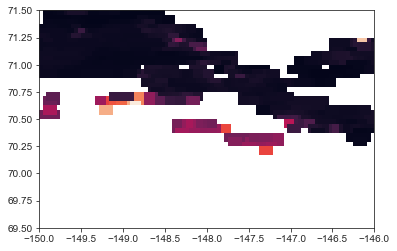

In [470]:
plt.pcolormesh(lon,lat,chla,shading= 'auto')

In [471]:
# Should be a negative longitude value
#Prud_Bay_ALL['Longitude']*= -1
Prud_Bay_ALL['Longitude']

285      -148.329800
286      -147.805900
287      -147.152600
288      -146.661700
289      -146.220300
             ...    
348147   -148.529440
348148   -148.529600
348149   -148.529520
348150   -148.529360
348151   -148.529632
Name: Longitude, Length: 331447, dtype: float64

/var/folders/ww/h0h0w96s1nd725gvjmt_rgbc0000gn/T/ipykernel_12434/2514288535.py:6: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  request = cimgt.StamenTerrain('terrain-background')


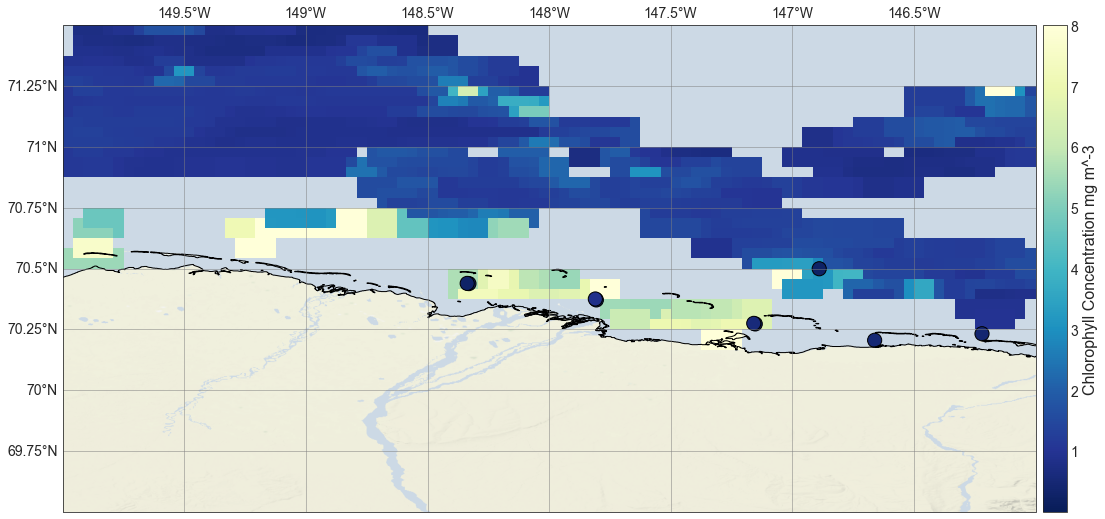

In [472]:
fig = plt.figure(figsize=(18,32))

#plt.suptitle(f'Distribution of concurrent SVC and Chla data', y=0.6, fontsize=20)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
# request = cimgt.GoogleTiles()
request = cimgt.StamenTerrain('terrain-background')

zoom = 10
ax.add_image(request, zoom, alpha=0.5)
coastline = cfeature.GSHHSFeature(scale='full',levels=[1])

#The dataset scale. One of ‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ’high, or ‘full’ (default is ‘auto’).
ax.add_feature(coastline)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.bottom_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
ax.set_extent([-146,-150, 69.5, 71.5], crs=ccrs.PlateCarree())

plot = ax.pcolormesh(lon,lat,chla, shading='auto', cmap='YlGnBu_r', vmin=0, vmax=8)
divider = make_axes_locatable(ax)

ax_cb = divider.new_horizontal(size='2.5%', pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)

# colorbar
cbar = plt.colorbar(plot, cax=ax_cb)
cbar.ax.tick_params(labelsize=14, rotation=0, size=0)
cbar.set_label('Chlorophyll Concentration mg m^-3', fontsize=16)
cbar.set_ticks(cbar.locator.tick_values(1,16))


#ax.scatter([-148, -148.5], [70.75, 71], s=100, c=[1,2], edgecolor='k', vmin=1, vmax=10, cmap='jet')
ax.scatter(August['Longitude'],August['Latitude'], s=200,marker = 'o', c=August['Chlorophyll_ug/L'], edgecolor='black', vmin=0, vmax=8, cmap='YlGnBu_r')


<urlopen error [Errno 60] Operation timed out>


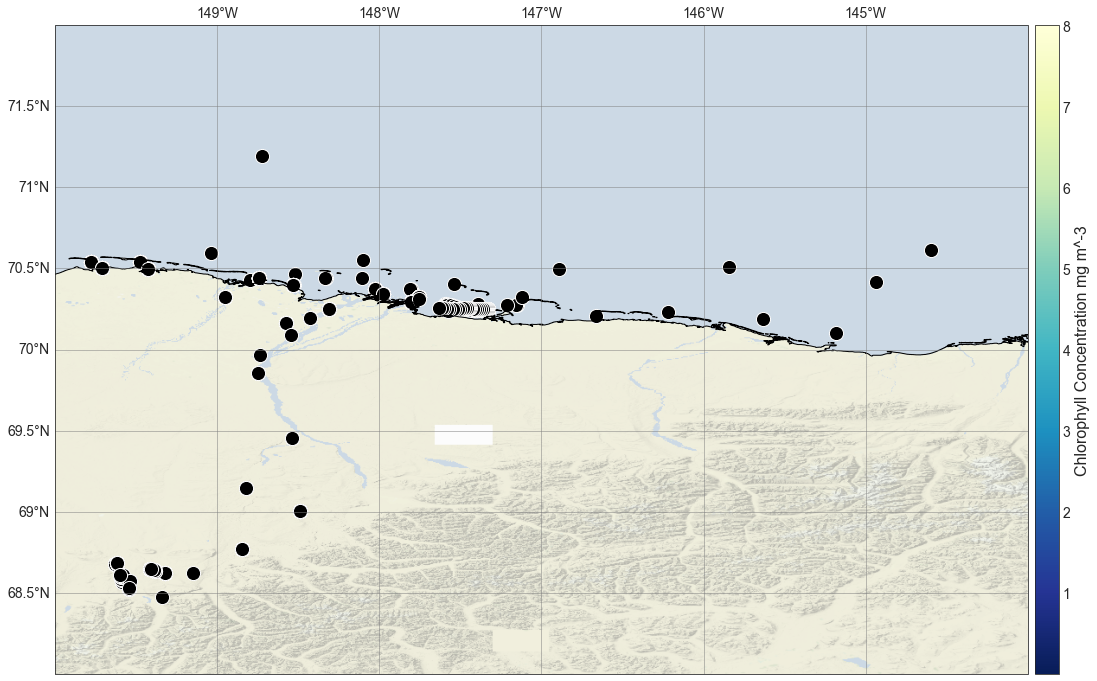

In [473]:
fig = plt.figure(figsize=(18,32))

#plt.suptitle(f'Distribution of concurrent SVC and Chla data (N={len(mlr_dict)})', y=0.6, fontsize=20)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
# request = cimgt.GoogleTiles()
request = cimgt.Stamen('terrain-background')

zoom = 10
ax.add_image(request, zoom, alpha=0.5)
coastline = cfeature.GSHHSFeature(scale='full',levels=[1])

#The dataset scale. One of ‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ’high, or ‘full’ (default is ‘auto’).
ax.add_feature(coastline)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.bottom_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
ax.set_extent([-144,-150, 68, 72], crs=ccrs.PlateCarree())

#plot = ax.pcolormesh(lon,lat,chla, shading='auto', cmap='YlGnBu_r', vmin=0, vmax=8)
divider = make_axes_locatable(ax)

ax_cb = divider.new_horizontal(size='2.5%', pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)

# colorbar
cbar = plt.colorbar(plot, cax=ax_cb)
cbar.ax.tick_params(labelsize=14, rotation=0, size=0)
cbar.set_label('Chlorophyll Concentration mg m^-3', fontsize=16)
cbar.set_ticks(cbar.locator.tick_values(1,16))


#ax.scatter([-148, -148.5], [70.75, 71], s=100, c=[1,2], edgecolor='k', vmin=1, vmax=10, cmap='jet')
ax.scatter(Prud_Bay_ALL['Longitude'],Prud_Bay_ALL['Latitude'], s=200,marker = 'o', c= 'black', edgecolor='white')